# Our goal for this part:
* Extracting numeric values from row data
* Preparing numbers into further Analysis.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
pd.pandas.set_option('display.max_columns', None)


In [64]:
df = pd.read_excel(r"\Users\pkucharzak\Desktop\stats\Kopia pliku Dutch Houses Prices - Statistical Inference.xlsx", na_values = 'Nan')

In [65]:
df.head()

,Address,City,Price,Lot size (m2),Living space size (m2),Build year,Build type,House type,Roof,Rooms,Toilet,Floors,Energy label,Position,Garden
0,Marsstukken 30,Aalden,515.0,617 m²,221 m²,1979.0,Bestaande bouw,"Herenhuis, vrijstaande woning",Zadeldak bedekt met pannen,7 kamers (6 slaapkamers),1 badkamer en 2 aparte toiletten,"2 woonlagen, een zolder en een kelder",D,Aan rustige weg en vrij uitzicht,"Achtertuin, voortuin en zijtuin"
1,Vivaldihof 26,Aalsmeer,360.0,101 m²,69 m²,1968.0,Bestaande bouw,"Eengezinswoning, hoekwoning",Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer,3 woonlagen,D,"Aan park, aan rustige weg en in woonwijk",Achtertuin
2,Apollostraat 9,Aalsmeer,475.0,168 m²,143 m²,1971.0,Bestaande bouw,"Eengezinswoning, hoekwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,C,Aan park en in woonwijk,Achtertuin en voortuin
3,Händelstraat 27,Aalsmeer,435.0,148 m²,132 m²,1968.0,Bestaande bouw,"Eengezinswoning, tussenwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,"Aan rustige weg, in woonwijk en vrij uitzicht",Achtertuin en voortuin
4,Roerdomplaan 98,Aalsmeer,440.0,170 m²,143 m²,1975.0,Bestaande bouw,"Eengezinswoning, tussenwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,C,In woonwijk,Achtertuin en voortuin


In [66]:
# Lets look how many missing values appear in data 

df.isna().mean()

Address                   0.000000
City                      0.000000
Price                     0.000000
Lot size (m2)             0.000000
Living space size (m2)    0.000000
Build year                0.015122
Build type                0.000000
House type                0.000000
Roof                      0.000000
Rooms                     0.000000
Toilet                    0.000000
Floors                    0.000000
Energy label              0.000000
Position                  0.054725
Garden                    0.010441
dtype: float64

In [67]:
# Look for dtypes of data

df.info(memory_usage = 'Deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Address                 5555 non-null   object
 1   City                    5555 non-null   object
 2   Price                   5555 non-null   object
 3   Lot size (m2)           5555 non-null   object
 4   Living space size (m2)  5555 non-null   object
 5   Build year              5471 non-null   object
 6   Build type              5555 non-null   object
 7   House type              5555 non-null   object
 8   Roof                    5555 non-null   object
 9   Rooms                   5555 non-null   object
 10  Toilet                  5555 non-null   object
 11  Floors                  5555 non-null   object
 12  Energy label            5555 non-null   object
 13  Position                5251 non-null   object
 14  Garden                  5497 non-null   object
dtypes: o

In [68]:
df.columns

Index(['Address', 'City', 'Price', 'Lot size (m2)', 'Living space size (m2)',
       'Build year', 'Build type', 'House type', 'Roof', 'Rooms', 'Toilet',
       'Floors', 'Energy label', 'Position', 'Garden'],
      dtype='object')

In [69]:
# Changing columns names

df = df.rename(columns = {
                        'Lot size (m2)':'Lot_size(m2)',
                        'Living space size (m2)':'Living_space(m2)',
                        'Build year':'Build_yrs',
                        'Build type':'Build_type',
                        'House type':'House_type',
                        'Energy label':'Energy_label',    
                    }
)

In [70]:
df.head(2)

,Address,City,Price,Lot_size(m2),Living_space(m2),Build_yrs,Build_type,House_type,Roof,Rooms,Toilet,Floors,Energy_label,Position,Garden
0,Marsstukken 30,Aalden,515.0,617 m²,221 m²,1979.0,Bestaande bouw,"Herenhuis, vrijstaande woning",Zadeldak bedekt met pannen,7 kamers (6 slaapkamers),1 badkamer en 2 aparte toiletten,"2 woonlagen, een zolder en een kelder",D,Aan rustige weg en vrij uitzicht,"Achtertuin, voortuin en zijtuin"
1,Vivaldihof 26,Aalsmeer,360.0,101 m²,69 m²,1968.0,Bestaande bouw,"Eengezinswoning, hoekwoning",Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer,3 woonlagen,D,"Aan park, aan rustige weg en in woonwijk",Achtertuin


In [71]:
# Clean Address column to extract street name an house number

df['City'] = df['City'].str.split(' \\(', expand=True)[0]


In [72]:
# I need to fix "€", 'v.o.n','Prijs op aanvraag' and '.'
# I will use function def to apply changes into columns

def price_clean(var):
    if var is None:
        return None
    elif isinstance(var, float):
        return var
    elif var == 'Prijs op aanvraag':
        return None
    elif ' v.o.n' in var:
        return var.replace(" v.o.n","").replace('€', '').replace('.', '').strip()
    else:
        return var.replace('€', '').replace('.', '').strip()

df['Price'] = df['Price'].apply(lambda x: price_clean(x))


In [73]:
df['Price'].unique()

array([515.0, 360.0, 475.0, 435.0, 440.0, 775.0, 500.0, 575.0, '1075000',
       '1600000', 795.0, 780.0, 699.0, 750.0, 725.0, 825.0, '1250000',
       549.0, 499.0, 274.5, 675.0, 689.0, 875.0, 800.0, '1200000', 600.0,
       '1150000', 390.0, '1000000', '1350000', '1365000', '4350000',
       299.0, 749.0, 698.0, 275.0, 350.0, 450.0, 889.0, 319.0, 540.0,
       345.0, 495.0, 375.0, 650.0, 585.0, 489.0, 685.0, 400.0, 550.0,
       395.0, 315.0, 485.0, 700.0, 589.0, 595.0, 905.0, 340.0, 359.0,
       490.0, 325.0, '1095000', '1995000', 285.0, 389.0, 200.0, 365.0,
       695.0, 245.0, 925.0, 199.0, 249.0, 242.5, 195.0, 790.0, 995.0,
       525.0, '1125000', 385.0, 320.0, 399.0, 330.0, 625.0, 425.0, 935.0,
       370.0, 335.0, 465.0, 635.0, 943.0, 570.0, 965.0, 349.0, '1050000',
       565.0, 310.0, 765.0, 443.0, 945.0, 415.0, 398.0, 479.0, None,
       '1098000', 419.0, 539.0, 545.0, 769.0, 410.0, 449.0, 439.0, 569.0,
       429.0, 669.0, 445.0, '1450000', 895.0, 774.0, 649.0, 537.5, 670

In [74]:
def clean_numbers(lst):
    cleaned_lst = []
    for num in lst:
        if isinstance(num, str) and num.isnumeric():
            cleaned_lst.append(int(num))
        elif isinstance(num, (int, float)):
            if num >= 1000000:
                cleaned_lst.append(num)
            else:
                cleaned_lst.append(int(num*1000))
        else:
            cleaned_lst.append(None)
    return cleaned_lst

# Fill missing or null values with a default value of 0
df['Price'] = df['Price'].fillna(0)

# Apply the clean_numbers function to the 'Price' column
df['Price'] = clean_numbers(df['Price'])

In [75]:
df['Price'].nlargest(20)

880     4700000
3615    4500000
5067    4450000
36      4350000
5052    4250000
339     3995000
925     3950000
2262    3750000
302     3500000
721     3500000
3369    3475000
1638    3200000
1104    3150000
5050    2980000
844     2950000
3107    2950000
3370    2950000
348     2925000
5032    2895000
4984    2750000
Name: Price, dtype: int64

In [76]:
# Delete m2 and '.' from 'Lot_size(m2)' values

def lot_size_clean(var):
    if isinstance(var,float):
        return var
    else:
        expand = var.str.split(' ',expand = True)[0].str.replace(".",'', regex = False)
        return expand

df['Lot_size(m2)'] = lot_size_clean(df['Lot_size(m2)'])

In [77]:
# Delete m2 from 'Living_space(m2)' values

def living_space_clean(var):
    expand = var.str.split(' ',expand = True)[0]
    return expand

df['Living_space(m2)'] = lot_size_clean(df['Living_space(m2)'])

In [78]:
# Fix data with which include 'Voor' and 'Na' which in Netherland 'Voor' mean After and 'Na' Before

def build_clean(var):
    if isinstance(var,float):
        return var
    elif 'Voor 1906' in var:
        return var.replace('Voor 1906','1907')
    elif 'Na 2020' in var:
        return var.replace('Na 2020','2019')
    else:
        return var
    
df['Build_yrs'] = df['Build_yrs'].apply(lambda x: build_clean(x)).astype('float')

In [79]:
# In this column we had only two value and now 0 will mean 'Bestaande bouw' and 1 Bestaande bouw nue

df['Build_type'] = np.where(df['Build_type'] == 'Bestaande bouw',0,1)

In [80]:
# Extract Rooms from 'Room' table

df['Rooms'].str.split(' \\(', expand=True)[0].str.split(' ',expand=True)[0]

0       7
1       4
2       5
3       5
4       5
       ..
5550    5
5551    5
5552    4
5553    7
5554    3
Name: 0, Length: 5555, dtype: object

In [81]:
# define total rooms in the building from 'Room' column

def rooms_kamer(var):
    word = var.str.split(' \\(', expand = True)[0]
    word1 = word.str.split(' ', expand = True)[0]
    return word1

df['Rooms_total'] = rooms_kamer(df['Rooms'])

In [82]:
# extract bedrooms from 'Rooms'

def bedrooms(var):
    word = var.str.split(' \\(', expand = True)[1]
    word1 = word.str.split(' ', expand = True)[0]
    return word1

df['Bedrooms'] = bedrooms(df['Rooms']).fillna(0)

In [83]:
# extract roof_type from 'Roof'

df[['Roof_1','Roof_2']] = df['Roof'].str.split(', ',expand=True)

In [84]:
df.columns

Index(['Address', 'City', 'Price', 'Lot_size(m2)', 'Living_space(m2)',
       'Build_yrs', 'Build_type', 'House_type', 'Roof', 'Rooms', 'Toilet',
       'Floors', 'Energy_label', 'Position', 'Garden', 'Rooms_total',
       'Bedrooms', 'Roof_1', 'Roof_2'],
      dtype='object')

In [85]:
## define badkamers from 'Toilet column'

def toilet(var):
    word = var.str.split(' en', expand = True)[0]
    word1 = word.str.split(' ', expand = True)[0]
    return word1

df['Toilets'] = toilet(df['Toilet'])

In [86]:
## define external toilet 

def external_toilet(var):
        word = var.str.split(' en', expand = True)[0]
        word1 = word.str.split(' ', expand = True)[0]
        return word1

df['External_Toilet'] = external_toilet(df['Toilet'])

In [87]:
df.head()

,Address,City,Price,Lot_size(m2),Living_space(m2),Build_yrs,Build_type,House_type,Roof,Rooms,Toilet,Floors,Energy_label,Position,Garden,Rooms_total,Bedrooms,Roof_1,Roof_2,Toilets,External_Toilet
0,Marsstukken 30,Aalden,515000,617,221,1979.0,0,"Herenhuis, vrijstaande woning",Zadeldak bedekt met pannen,7 kamers (6 slaapkamers),1 badkamer en 2 aparte toiletten,"2 woonlagen, een zolder en een kelder",D,Aan rustige weg en vrij uitzicht,"Achtertuin, voortuin en zijtuin",7,6,Zadeldak bedekt met pannen,None,1,1
1,Vivaldihof 26,Aalsmeer,360000,101,69,1968.0,0,"Eengezinswoning, hoekwoning",Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer,3 woonlagen,D,"Aan park, aan rustige weg en in woonwijk",Achtertuin,4,3,Zadeldak bedekt met pannen,None,1,1
2,Apollostraat 9,Aalsmeer,475000,168,143,1971.0,0,"Eengezinswoning, hoekwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,C,Aan park en in woonwijk,Achtertuin en voortuin,5,4,Zadeldak bedekt met pannen,None,1,1
3,Händelstraat 27,Aalsmeer,435000,148,132,1968.0,0,"Eengezinswoning, tussenwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,D,"Aan rustige weg, in woonwijk en vrij uitzicht",Achtertuin en voortuin,5,4,Zadeldak bedekt met pannen,None,1,1
4,Roerdomplaan 98,Aalsmeer,440000,170,143,1975.0,0,"Eengezinswoning, tussenwoning",Zadeldak bedekt met pannen,5 kamers (4 slaapkamers),1 badkamer en 1 apart toilet,3 woonlagen,C,In woonwijk,Achtertuin en voortuin,5,4,Zadeldak bedekt met pannen,None,1,1


In [88]:
## Extracting floors

def floors(var):
    word = var.str.split(' ',expand=True)[0]
    return word

df['Floor'] = floors(df['Floors']).astype('float')

In [89]:
# Extracting extra floors 'zolder','kelder','vliering'

df['Zolder'] = np.where(df['Floors'].str.contains('zolder'),1,0)
df['Kelder'] = np.where(df['Floors'].str.contains('kelder'),1,0)
df['Vliering'] = np.where(df['Floors'].str.contains('vliering'),1,0)
df['Total_floors'] = df['Zolder'] + df['Kelder'] + df['Vliering'] + df['Floor']


In [90]:
df.head(2)

,Address,City,Price,Lot_size(m2),Living_space(m2),Build_yrs,Build_type,House_type,Roof,Rooms,Toilet,Floors,Energy_label,Position,Garden,Rooms_total,Bedrooms,Roof_1,Roof_2,Toilets,External_Toilet,Floor,Zolder,Kelder,Vliering,Total_floors
0,Marsstukken 30,Aalden,515000,617,221,1979.0,0,"Herenhuis, vrijstaande woning",Zadeldak bedekt met pannen,7 kamers (6 slaapkamers),1 badkamer en 2 aparte toiletten,"2 woonlagen, een zolder en een kelder",D,Aan rustige weg en vrij uitzicht,"Achtertuin, voortuin en zijtuin",7,6,Zadeldak bedekt met pannen,None,1,1,2.0,1,1,0,4.0
1,Vivaldihof 26,Aalsmeer,360000,101,69,1968.0,0,"Eengezinswoning, hoekwoning",Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer,3 woonlagen,D,"Aan park, aan rustige weg en in woonwijk",Achtertuin,4,3,Zadeldak bedekt met pannen,None,1,1,3.0,0,0,0,3.0


In [91]:
# look for Energy label and adding 

df['Energy_label'].value_counts()

C                 1545
A                 1254
B                  926
D                  642
E                  416
F                  300
G                  284
A+                  87
Niet verplicht      58
A++                 22
A+++                18
A++++                3
Name: Energy_label, dtype: int64

In [92]:
# Mapping dictionary with value  to create ranking labels

mapping_dict = {
    'A++++': 1,
    'A+++': 2,
    'A++': 3,
    'A+': 4,
    'A': 5,
    'B': 6,
    'C': 7,
    'D': 8,
    'E': 9,
    'F': 10,
    'G': 11,
    'Niet Verplicht': -1
}

df['Energy_rank'] = df['Energy_label'].map(mapping_dict).fillna(-1)

In [93]:
df['Energy_rank'].value_counts()

 7.0     1545
 5.0     1254
 6.0      926
 8.0      642
 9.0      416
 10.0     300
 11.0     284
 4.0       87
-1.0       58
 3.0       22
 2.0       18
 1.0        3
Name: Energy_rank, dtype: int64

In [94]:
# Creating price per (m2)

df['Price_per_(m2)'] = df['Price'].astype('float') / df['Living_space(m2)'].astype('float')

In [95]:
# Creating median value of all Prices find diff between Median and actual house price for further analysis

df['Median_total'] = df['Price'].median()
df['Dif_Price_Median'] = df['Price'] - df['Median_total']

In [96]:
df.head(2)

,Address,City,Price,Lot_size(m2),Living_space(m2),Build_yrs,Build_type,House_type,Roof,Rooms,Toilet,Floors,Energy_label,Position,Garden,Rooms_total,Bedrooms,Roof_1,Roof_2,Toilets,External_Toilet,Floor,Zolder,Kelder,Vliering,Total_floors,Energy_rank,Price_per_(m2),Median_total,Dif_Price_Median
0,Marsstukken 30,Aalden,515000,617,221,1979.0,0,"Herenhuis, vrijstaande woning",Zadeldak bedekt met pannen,7 kamers (6 slaapkamers),1 badkamer en 2 aparte toiletten,"2 woonlagen, een zolder en een kelder",D,Aan rustige weg en vrij uitzicht,"Achtertuin, voortuin en zijtuin",7,6,Zadeldak bedekt met pannen,None,1,1,2.0,1,1,0,4.0,8.0,2330.316742,465000.0,50000.0
1,Vivaldihof 26,Aalsmeer,360000,101,69,1968.0,0,"Eengezinswoning, hoekwoning",Zadeldak bedekt met pannen,4 kamers (3 slaapkamers),1 badkamer,3 woonlagen,D,"Aan park, aan rustige weg en in woonwijk",Achtertuin,4,3,Zadeldak bedekt met pannen,None,1,1,3.0,0,0,0,3.0,8.0,5217.391304,465000.0,-105000.0


In [97]:
df[['House_types','House_types_info']] = df['House_type'].str.split(', ',expand=True)

In [98]:
df[['Garden_type','Garden_info']] = df['Garden'].str.split(', ',expand = True)[[0,1]]

In [99]:
df['Position'].str.split(', ', expand = True)[[0]].value_counts().iloc[:30]

# centrum, rustige weg, woonwijk, park, bosrand, drukke weg, Beschutte ligging, water, vaarwater, buiten bebouwde kom,

Aan rustige weg en in woonwijk             1516
Aan rustige weg                            1293
In woonwijk                                 888
In centrum                                  176
Aan park                                    173
Aan bosrand                                 124
In woonwijk en vrij uitzicht                115
In centrum en in woonwijk                    92
Aan drukke weg                               74
Aan rustige weg en in centrum                69
Beschutte ligging en in woonwijk             68
Beschutte ligging                            64
Aan vaarwater                                54
Aan water                                    50
Buiten bebouwde kom                          34
Aan drukke weg en in woonwijk                33
Aan water en in woonwijk                     30
Vrij uitzicht                                28
Landelijk gelegen                            26
In bosrijke omgeving                         24
In bosrijke omgeving en in woonwijk     

In [100]:
# Making the list of most common values and buld seperate collumns

def contains_word(s, word):
    if isinstance(s, str) and word in s:
        return 1
    else:
        return 0

words_to_search = ['centrum', 'woonwijk', 'park', 'bosrand', 'water', 'rustige weg', 'drukke weg', 'beschutte ligging', 'vaarwater', 'buiten bebouwde kom']

for word in words_to_search:
    df[word] = df['Position'].apply(lambda x: contains_word(x, word))
df['other'] = 1 - df[words_to_search].max(axis=1)

In [101]:
# Dropping unnecessary column

df = df.drop(
    [
        'House_type',
        'Garden',
        'Position',
        'Roof',
        'Rooms',
        'Toilet',
        'Floors',
        
    ],axis = 1
)

In [102]:
## Rename column and adjust type

df = df.rename(columns = 
             {
                 'water':'Water',
                 'bosrand':'Bosrand',
                 'park':'Park',
                 'woonwijk':'Woonwijk',
                 'centrum':'Centrum',
                 'rustige weg':'Rustuge_weg',
                 'drukke weg':'Drukke_weg',
                 'beschutte ligging':'beschutte_ligging',
                 'buiten bebouwde kom':'Buiten_bebouwde_kom'
             }
)

# Adjusting type in collumns and reorder

In [103]:
# Adjusting type in collumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Address              5555 non-null   object 
 1   City                 5555 non-null   object 
 2   Price                5555 non-null   int64  
 3   Lot_size(m2)         5555 non-null   object 
 4   Living_space(m2)     5555 non-null   object 
 5   Build_yrs            5471 non-null   float64
 6   Build_type           5555 non-null   int32  
 7   Energy_label         5555 non-null   object 
 8   Rooms_total          5555 non-null   object 
 9   Bedrooms             5555 non-null   object 
 10  Roof_1               5555 non-null   object 
 11  Roof_2               7 non-null      object 
 12  Toilets              5555 non-null   object 
 13  External_Toilet      5555 non-null   object 
 14  Floor                5555 non-null   float64
 15  Zolder               5555 non-null   i

In [104]:
# finding object type

df = df.astype(
    {
        'City':'category',
        'Energy_label':'category',
        'House_types':'category',
        'House_types_info':'category',
        'Garden_type':'category',
        'Garden_info':'category',
        'Roof_1':'category',
        'Roof_2':'category'
    }
)

In [105]:
# lets reindex columns in way Datetime, Object, category, and rest as int


# Find columns with Datetime
var_date = [var for var in df.columns if df[var].dtypes == 'datetime64[ns]']

# Find columns with object dtype
obj_var = [var for var in df.columns if df[var].dtypes == 'O']
obj_int = [var for var in df.columns if df[var].dtypes == 'O' and var != 'Address']
df[obj_int] = df[obj_int].astype('int')

# Find columns with category dtype
cat_var = [var for var in df.columns if df[var].dtypes == 'category']

# List with dtypes that i will looking for 
num_dtypes = ['int8','int32', 'int64', 'float64']

# Find columns with descriptive values
desc_vars = [var for var in df.columns if df[var].dtype in num_dtypes and var != 'Price' and var != 'Median_total' and len(df[var].unique()) <= 12]
df[desc_vars] = df[desc_vars].astype('int32')

# Fing columns with continoues values
cont_vars = [var for var in df.columns if df[var].dtype in num_dtypes and len(df[var].unique()) > 10]

# bild list of columns

columns = var_date + obj_var + cat_var + desc_vars + cont_vars

# numeric list of columns

numeric = desc_vars + cont_vars

In [106]:
print(columns)

['Address', 'Lot_size(m2)', 'Living_space(m2)', 'Rooms_total', 'Bedrooms', 'Toilets', 'External_Toilet', 'City', 'Energy_label', 'Roof_1', 'Roof_2', 'House_types', 'House_types_info', 'Garden_type', 'Garden_info', 'Build_type', 'Toilets', 'External_Toilet', 'Floor', 'Zolder', 'Kelder', 'Vliering', 'Total_floors', 'Energy_rank', 'Centrum', 'Woonwijk', 'Park', 'Bosrand', 'Water', 'Rustuge_weg', 'Drukke_weg', 'beschutte_ligging', 'vaarwater', 'Buiten_bebouwde_kom', 'other', 'Price', 'Lot_size(m2)', 'Living_space(m2)', 'Build_yrs', 'Rooms_total', 'Bedrooms', 'Energy_rank', 'Price_per_(m2)', 'Dif_Price_Median']


In [107]:
df.reindex(columns = columns)

,Address,Lot_size(m2),Living_space(m2),Rooms_total,Bedrooms,Toilets,External_Toilet,City,Energy_label,Roof_1,Roof_2,House_types,House_types_info,Garden_type,Garden_info,Build_type,Toilets,External_Toilet,Floor,Zolder,Kelder,Vliering,Total_floors,Energy_rank,Centrum,Woonwijk,Park,Bosrand,Water,Rustuge_weg,Drukke_weg,beschutte_ligging,vaarwater,Buiten_bebouwde_kom,other,Price,Lot_size(m2),Living_space(m2),Build_yrs,Rooms_total,Bedrooms,Energy_rank,Price_per_(m2),Dif_Price_Median
0,Marsstukken 30,617,221,7,6,1,1,Aalden,D,Zadeldak bedekt met pannen,NaN,Herenhuis,vrijstaande woning,Achtertuin,voortuin en zijtuin,0,1,1,2,1,1,0,4,8,0,0,0,0,0,1,0,0,0,0,0,515000,617,221,1979.0,7,6,8,2330.316742,50000.0
1,Vivaldihof 26,101,69,4,3,1,1,Aalsmeer,D,Zadeldak bedekt met pannen,NaN,Eengezinswoning,hoekwoning,Achtertuin,NaN,0,1,1,3,0,0,0,3,8,0,1,1,0,0,1,0,0,0,0,0,360000,101,69,1968.0,4,3,8,5217.391304,-105000.0
2,Apollostraat 9,168,143,5,4,1,1,Aalsmeer,C,Zadeldak bedekt met pannen,NaN,Eengezinswoning,hoekwoning,Achtertuin en voortuin,NaN,0,1,1,3,0,0,0,3,7,0,1,1,0,0,0,0,0,0,0,0,475000,168,143,1971.0,5,4,7,3321.678322,10000.0
3,Händelstraat 27,148,132,5,4,1,1,Aalsmeer,D,Zadeldak bedekt met pannen,NaN,Eengezinswoning,tussenwoning,Achtertuin en voortuin,NaN,0,1,1,3,0,0,0,3,8,0,1,0,0,0,1,0,0,0,0,0,435000,148,132,1968.0,5,4,8,3295.454545,-30000.0
4,Roerdomplaan 98,170,143,5,4,1,1,Aalsmeer,C,Zadeldak bedekt met pannen,NaN,Eengezinswoning,tussenwoning,Achtertuin en voortuin,NaN,0,1,1,3,0,0,0,3,7,0,1,0,0,0,0,0,0,0,0,0,440000,170,143,1975.0,5,4,7,3076.923077,-25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5550,Kamerlingh Onneslaan 40,247,128,5,4,1,1,Zwolle,F,Zadeldak bedekt met pannen,NaN,Herenhuis,2-onder-1-kapwoning,Achtertuin,voortuin en zonneterras,0,1,1,3,0,0,0,3,10,0,1,0,0,0,1,0,1,0,0,0,525000,247,128,1969.0,5,4,10,4101.562500,60000.0
5551,Boorn 33,413,120,5,4,1,1,Zwolle,D,Zadeldak bedekt met pannen,NaN,Eengezinswoning,2-onder-1-kapwoning,Achtertuin,voortuin en zijtuin,0,1,1,2,0,0,0,2,8,0,1,0,0,0,0,0,0,0,0,0,460000,413,120,1973.0,5,4,8,3833.333333,-5000.0
5552,Goudplevierstraat 97,131,124,4,2,1,1,Zwolle,B,Plat dak bedekt met bitumineuze dakbedekking,NaN,Eengezinswoning,tussenwoning (patiowoning),Patio/atrium,NaN,0,1,1,2,0,0,0,2,6,0,1,0,0,0,1,0,1,0,0,0,449000,131,124,1999.0,4,2,6,3620.967742,-16000.0
5553,Veldweg 8,342,145,7,4,1,1,Zwolle,A,Samengesteld dak bedekt met pannen,NaN,Eengezinswoning,2-onder-1-kapwoning,Achtertuin,voortuin en zijtuin,0,1,1,3,0,0,0,3,5,0,1,0,0,0,1,0,0,0,0,0,595000,342,145,2005.0,7,4,5,4103.448276,130000.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Address              5555 non-null   object  
 1   City                 5555 non-null   category
 2   Price                5555 non-null   int64   
 3   Lot_size(m2)         5555 non-null   int32   
 4   Living_space(m2)     5555 non-null   int32   
 5   Build_yrs            5471 non-null   float64 
 6   Build_type           5555 non-null   int32   
 7   Energy_label         5555 non-null   category
 8   Rooms_total          5555 non-null   int32   
 9   Bedrooms             5555 non-null   int32   
 10  Roof_1               5555 non-null   category
 11  Roof_2               7 non-null      category
 12  Toilets              5555 non-null   int32   
 13  External_Toilet      5555 non-null   int32   
 14  Floor                5555 non-null   int32   
 15  Zolder               

# Now we will make further EDA to find some more insights
## Lets start from the beggining

In [109]:
# I will look for missing data and if mising data could have potential impact for our analysis

df.isna().mean().sort_values(ascending = False)

Roof_2                 0.998740
Garden_info            0.793519
Build_yrs              0.015122
Garden_type            0.010441
Address                0.000000
Dif_Price_Median       0.000000
House_types            0.000000
House_types_info       0.000000
Centrum                0.000000
Woonwijk               0.000000
Park                   0.000000
Price_per_(m2)         0.000000
Bosrand                0.000000
Water                  0.000000
Rustuge_weg            0.000000
Drukke_weg             0.000000
beschutte_ligging      0.000000
vaarwater              0.000000
Buiten_bebouwde_kom    0.000000
Median_total           0.000000
Energy_rank            0.000000
City                   0.000000
Bedrooms               0.000000
Price                  0.000000
Lot_size(m2)           0.000000
Living_space(m2)       0.000000
Build_type             0.000000
Energy_label           0.000000
Rooms_total            0.000000
Roof_1                 0.000000
Total_floors           0.000000
Toilets 

In [110]:
# Roof_2: We can see that column that was made by me after split generate 99.8% missing data to instead i will make only one column without extansion
# Garden_type: Genrate 79% of missing value but i will hold it for further analysis
# I will make attention for Build_yrs and Price

df.drop('Roof_2',axis = 1, inplace= True)

Build_yrs vs Price where np.nan:       573880.9523809524
Build_yrs vs Price where data exist:   557526.3048802778
Differance: -16354.64750067459


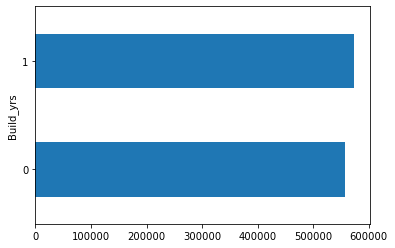

In [111]:
missing = ['Build_yrs']


def missing_analysis(df,var):
    df = df.copy()
    df[var] = np.where(df[var].isna(),1,0)
    tmp = df.groupby(var)['Price'].agg('mean')
    tmp.plot(kind = 'barh', y = 'mean')
    print(f"{var} vs Price where np.nan:       {df.loc[df[var]==1,'Price'].mean()}")
    print(f"{var} vs Price where data exist:   {df.loc[df[var]==0,'Price'].mean()}")
    print(f"Differance: {(df.loc[df[var]==0,'Price'].mean()) - (df.loc[df[var]==1,'Price'].mean())}")
    
    
for var in missing:
    missing_analysis(df,var)

It appears that there is a significant difference in the mean price for properties with missing data in the 'Build_yrs' column compared to those with non-missing data.Properties with missing 'Build_yrs' data have a mean price of 573880.95, while properties with non-missing data have a mean price of 557526.30 which gives differance 16354.64. This difference suggests that the missing data may be related to the price of the properties in some way.

Additionally, the fact that there is only 1.5% missing data in the 'Build_yrs' column suggests that the impact of the missing data on your overall analysis may be relatively small. 

Overall, my opinion would be that the missing 'Build_yrs' data is worth investigating further to determine whether it has a significant impact on your analysis, but that it may not be a major concern depending on the specifics of your analysis.

In [112]:
# As missing data in Price have 0.1% we can drop that values

df = df.dropna(subset = ['Price','Price_per_(m2)','Dif_Price_Median'], axis = 0).query("Price > 1")

# QUESTIONS THAT I WILL TRY TO ANSWER.

* What is the average price of a house in the Dutch market? How has this changed over time?
* How does the price of a house vary depending on location (e.g. city)?
* What types of houses are most common in the Dutch market (e.g. single-family homes, apartments, etc.)? How do their prices compare?
* * What corelations we can find?, How do factors such as size, age, and condition of the house affect its price?
* Are there any notable trends in terms of what buyers are looking for in the Dutch market (e.g. certain features or amenities)?
* How does the Dutch market compare to other housing markets in Europe or around the world in terms of pricing and other factors?
* Are there any seasonal trends in the Dutch housing market (e.g. are certain times of year more active than others)?
* Are there any demographic or socioeconomic factors that seem to be correlated with higher or lower housing prices in the Dutch market?
* How do housing prices in the Dutch market compare to other asset classes (e.g. stocks, bonds, etc.) in terms of return on investment and risk?

### 4)  __Find correlations__

* between the size of a house and its price in the Dutch housing market?
* between the age of a house and its price in the Dutch housing market?
* between the location of a house (i.e. city center vs. suburbs) and its price in the Dutch housing market?
* between the number of bedrooms in a house and its price in the Dutch housing market?
* between the presence of certain amenities (e.g. a garden, a swimming pool) and the price of a house in the Dutch housing market?

* or any other?

<AxesSubplot:>

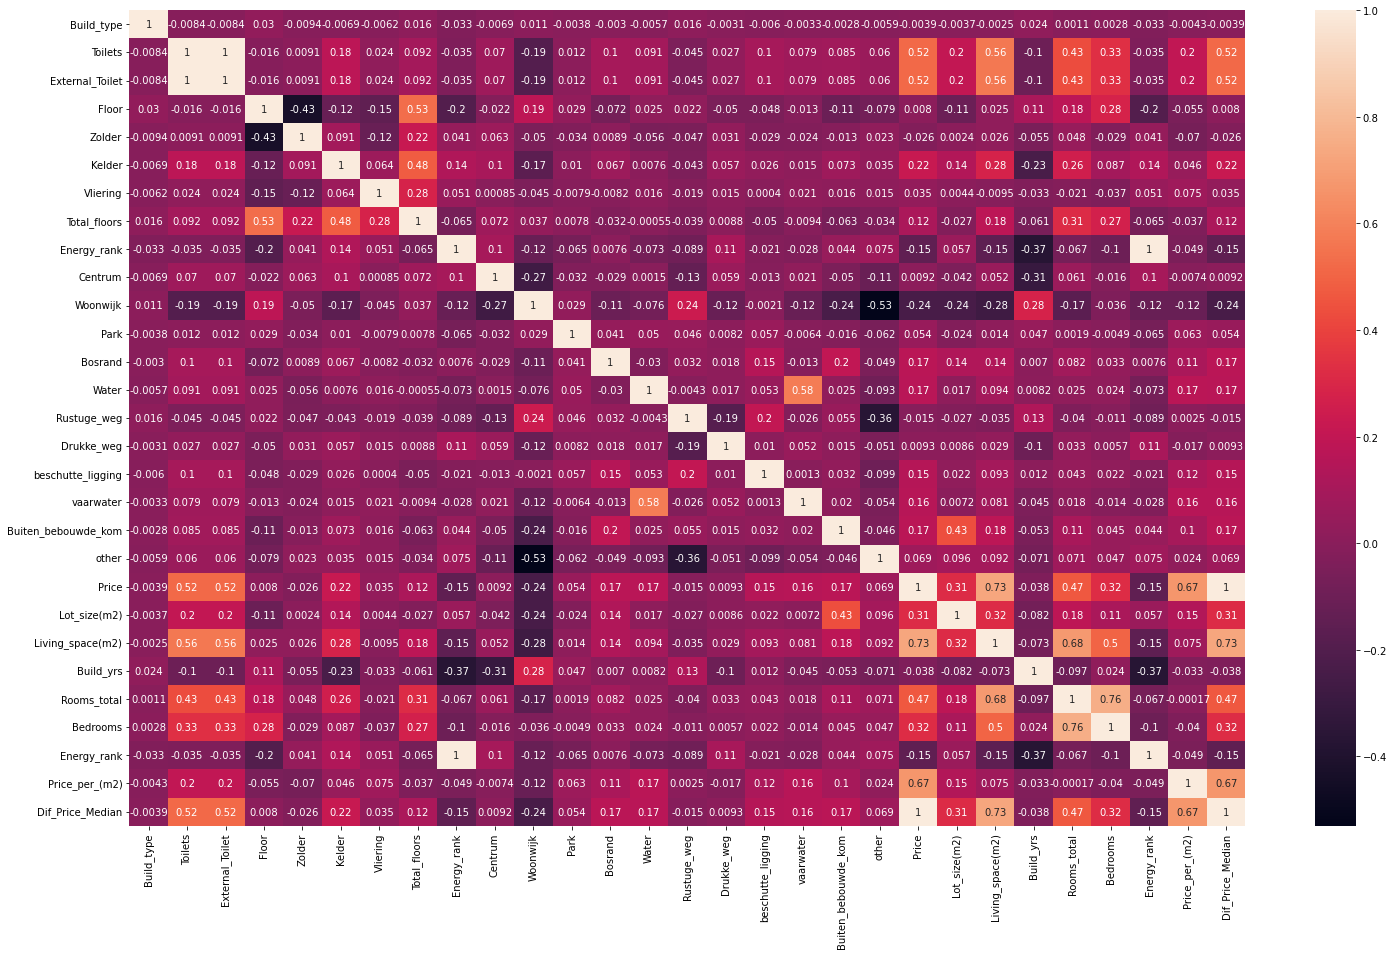

In [113]:
fig,ax = plt.subplots(figsize = (25,15))

sns.heatmap(
    df[numeric].corr(),
    annot = True
)

### Lets look closer into correlations:
* Price_per_(m2) vs. Build_yrs
* Price_per_(m2) vs. Dif_Price_Median
* Living_space(m2) vs. Price* 
* Living_space(m2) vs. Toilets
* Living_space(m2) vs. External Toilet 
* Build_yrs vs. Kelder
* Build_yrs vs. Energy_rank
* Build_yrs vs. Centrum
* Zolder vs Floor

### _1) What is the average price of a house in the Dutch market? How has this changed over time_

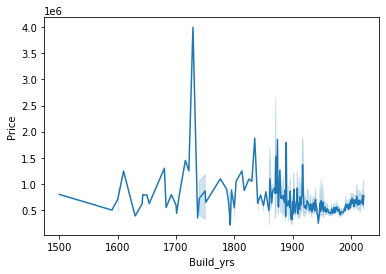

In [114]:
sns.lineplot(
    x = 'Build_yrs',
    y = 'Price',
    data = df
)
plt.show()

In [115]:
df['Build_yrs'].value_counts().sort_index().iloc[:20]

1500.0    1
1590.0    1
1600.0    3
1610.0    1
1625.0    1
1630.0    1
1642.0    1
1643.0    1
1650.0    2
1654.0    1
1680.0    1
1683.0    1
1692.0    1
1700.0    1
1701.0    1
1706.0    1
1716.0    1
1722.0    1
1729.0    1
1737.0    1
Name: Build_yrs, dtype: int64

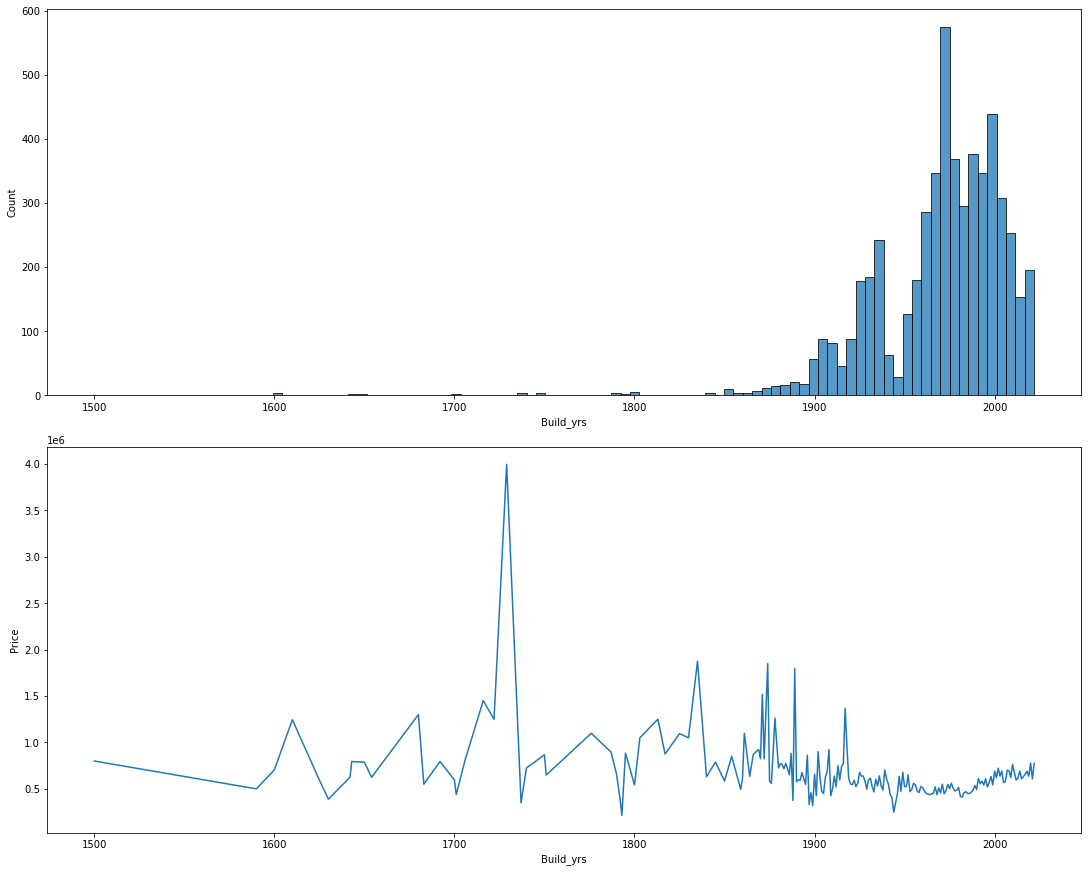

In [116]:
fig = plt.figure(constrained_layout = True, figsize = (15,12))
grid = gridspec.GridSpec(2,1,figure = fig)


ax1 = fig.add_subplot(grid[0,0])
ax1 = sns.histplot(
        x = 'Build_yrs',
        data = df,
        bins = 100
)

ax3 = fig.add_subplot(grid[1,0])
ax3 = sns.lineplot(
    x = 'Build_yrs',
    y = 'Price',
    data = df,
    ci = None
)




plt.show()

* To make our Analysis more clear let look for houses since 1900 where we have more values

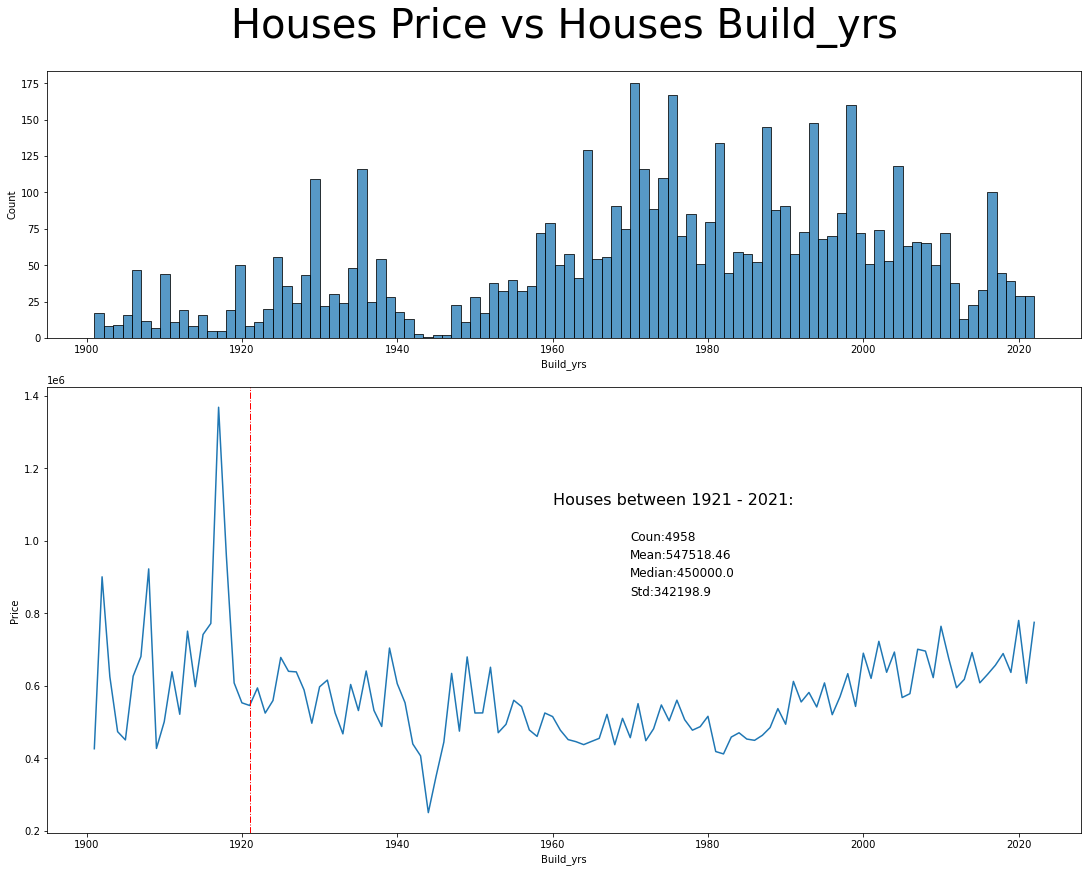

In [117]:
fig = plt.figure(constrained_layout = True, figsize = (15,12))
grid = gridspec.GridSpec(8,8,figure = fig)


count_houses_above_1921 = df.query("Build_yrs > 1921")['Price'].count()
mean_houses_above_1921 = df.query("Build_yrs > 1921")['Price'].mean()
median_houses_above_1921 = df.query("Build_yrs > 1921")['Price'].median()
std_houses_above_1921 = df.query("Build_yrs > 1921")['Price'].std()



ax1 = fig.add_subplot(grid[0:3,0:])
sns.histplot(
        x = 'Build_yrs',
        data = df.query("Build_yrs > 1900"),
        bins = 100,
        ax = ax1
)

ax3 = fig.add_subplot(grid[3:,0:])
ax3 = sns.lineplot(
    x = 'Build_yrs',
    y = 'Price',
    data = df.query("Build_yrs > 1900"),
    ci = None
)

plt.axvline(1921, ls = '-.', c = 'red', lw = 1)

plt.text(1960, 1100000, f"Houses between 1921 - 2021:", fontsize = 16)
plt.text(1970, 1000000, f"Coun:{count_houses_above_1921}", fontsize = 12)
plt.text(1970, 950000, f"Mean:{round(mean_houses_above_1921,2)}", fontsize = 12)
plt.text(1970, 900000, f"Median:{median_houses_above_1921}", fontsize = 12)
plt.text(1970, 850000, f"Std:{round(std_houses_above_1921,1)}", fontsize = 12)



ax1.set_title('Houses Price vs Houses Build_yrs', fontsize = 40,  y = 1.1)
plt.savefig('HousePrice_vs_Houses_yrs.jpg', dpi = 1000)


plt.show()

* Upon closer examination of the dataset, it is evident that the property prices till 1921 were highly inconsistent and lacked values, which could potentially skew the overall analysis. To provide a more accurate representation, the analysis will be focused on the data between 1921 and 2021, which is a more reliable and complete dataset. This approach will ensure that the analysis is based on a more consistent and accurate representation of the property prices over time.

* The analysis shows that the property prices between 1921 and 2021 have a median value of 450.0 thousand €, indicating that half of the properties in the dataset have prices below this value and the other half have prices above it. However, the mean price of 546856.67 thousand € is much higher than the median, suggesting the presence of a few very high-priced properties that are significantly impacting the average value.

* The standard deviation of 342520.8 means that there is a large amount of variability in the data, with values spread out from the mean. Specifically, the standard deviation is a measure of how much the individual data points deviate from the average value (mean) of the dataset. In this case, the high standard deviation indicates that there are many data points that are far from the average price, indicating a large range of prices for the properties in the dataset.

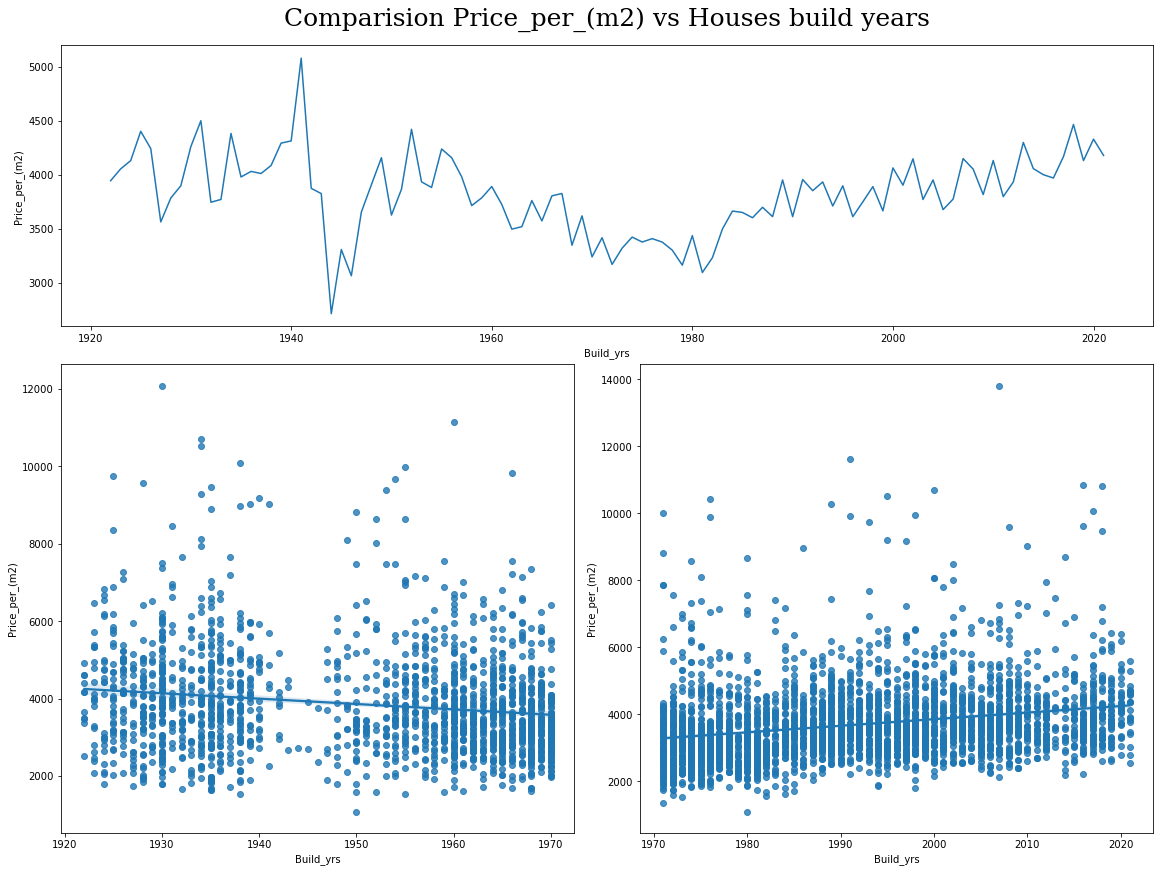

In [118]:
# Lets look how Pice Price_per_(m2) change in houses Build_yrs


fig = plt.figure(constrained_layout = True, figsize = (16,12))
grid = gridspec.GridSpec(8,8,figure = fig)




ax1 = fig.add_subplot(grid[0:3,:])
ax1 = sns.lineplot(
    x = 'Build_yrs',
    y = 'Price_per_(m2)',
    data = df.query("Build_yrs > 1921 and Build_yrs <= 2021"),
    ci = None
)

ax2 = fig.add_subplot(grid[3:,0:4])
ax2 = sns.regplot(
    x = 'Build_yrs',
    y = 'Price_per_(m2)',
    data = df.query("Build_yrs > 1921 and Build_yrs <= 1970")
)

ax3 = fig.add_subplot(grid[3:,4:])
ax3 = sns.regplot(
    x = 'Build_yrs',
    y = 'Price_per_(m2)',
    data = df.query("Build_yrs > 1970 and Build_yrs <= 2021")
)
ax1.set_title('Comparision Price_per_(m2) vs Houses build years', fontsize = 25, family='serif', y = 1.05)
plt.savefig('Comparision Price_per(m2) vs Houses build year.jpg',dpi = 1000)

plt.show()

* Based on observation, it appears that there was a period of decreasing Price_per_(m2) for houses built prior to 1970, followed by an increase in Price_per_(m2) for more recent constructions. This could be due to a variety of factors such as changes in housing demand, economic conditions, or housing regulations.

* As i mention befor there is very big different in some outlyers 

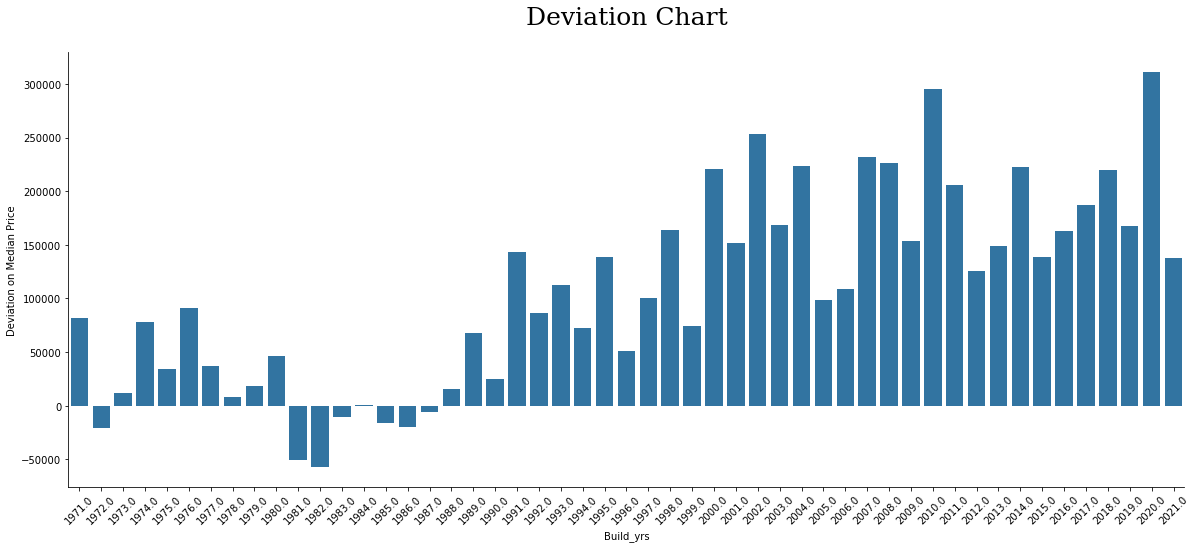

In [119]:
fig, ax = plt.subplots(figsize=(20, 8))

df1970 = df.query("Build_yrs > 1970 and Build_yrs <= 2021 and Price > 1").assign(
        difference=df['Price'] - df['Price'].median()
)


sns.barplot(
    x='Build_yrs',
    y='difference',
    data=df1970,
    ci=None,
    color='#1f77b4',
    ax=ax,
    saturation=0.75
)
ax.set_ylabel('Deviation on Median Price')
ax.set_title('Deviation Chart', fontsize = 25, family='serif', y = 1.05)
plt.xticks(rotation=45)
sns.despine()
plt.savefig('Deviation Chart.jpg',dpi = 1000)
plt.show()

* The housing market has consistently shown a pattern of increasing prices for houses built after 1987. This is likely due to the fact that houses constructed during this time period generally have better overall condition and quality, which is reflected in their higher market value. Additionally, newer houses often have modern features and amenities that are in high demand among buyers, further contributing to their appreciation in value over time. As such, the trend of constant growth in housing prices for houses built after 1990 is a reflection of their perceived value and desirability in the real estate market.

# Let look closer into House types and Energy ranking
* Looking for data set since 1970  



In [120]:
import researchpy as rp

In [121]:
summary = rp.summarize(df1970.groupby('House_types')['Price'])

C:\Users\pkucharzak\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\pkucharzak\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\pkucharzak\Anaconda3\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


In [122]:
import dataframe_image as dfi

summary.sort_values('N', ascending = False)
dfi.export(summary.sort_values('N', ascending = False),'summarize_df1970_grouped_House_type.jpg')

C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe


In [123]:
summary.sort_values('N', ascending = False)
 

,House_types,N,Mean,Median,Variance,SD,SE,95% Conf. Interval
1,Eengezinswoning,2630,4.723441e+05,439000.0,2.934514e+10,171304.2389,3340.3366,"[465794.1941, 478894.104]"
5,Villa,255,1.217320e+06,995000.0,4.374369e+11,661390.1459,41417.8575,"[1135753.4951, 1298885.8068]"
3,Herenhuis,141,7.070035e+05,675000.0,5.779665e+10,240409.3347,20246.1183,"[666975.8826, 747031.2096]"
0,Bungalow,114,6.050526e+05,565000.0,5.824615e+10,241342.3868,22603.7855,"[560270.4557, 649834.8075]"
4,Landhuis,49,1.225338e+06,975000.0,4.006864e+11,632997.9572,90428.2796,"[1043519.9011, 1407156.3846]"
6,Woonboerderij,22,9.793636e+05,990000.0,1.093793e+11,330725.3998,70510.8921,"[832728.2089, 1125999.0639]"
2,Grachtenpand,1,8.250000e+05,825000.0,NaN,NaN,NaN,"[nan, nan]"
7,Woonboot,1,6.250110e+05,625011.0,NaN,NaN,NaN,"[nan, nan]"


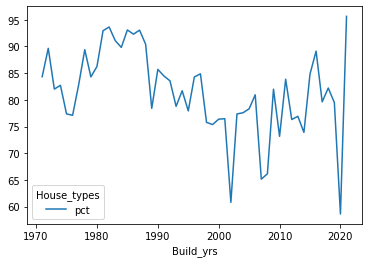

In [132]:
house_types = df1970.pivot_table(
    index='Build_yrs',
    columns='House_types',
    values='Price',
    aggfunc='count'
).assign(
    rest=lambda x: x.drop('Eengezinswoning', axis=1).sum(axis=1),
).loc[:, ['Eengezinswoning', 'rest']].assign(
    sums=lambda x: x['Eengezinswoning'] + x['rest'],
    pct=lambda x: round(x['Eengezinswoning'] / x['sums'] * 100, 2)
)

house_types[['pct']].plot()
plt.show()

 ### Summary describe:
    
    - 'House_types': This column represents the types of houses in the dataset.
    - 'N': This column shows the number of houses in each category of 'House_types'.
    - 'Mean': This column displays the mean (average) price of houses in each category of 'House_types'.
    - 'Median': This column represents the median price of houses in each category of 'House_types'.
    - 'Variance': This column shows the variance (a measure of how spread out the prices are) of houses in each category of 'House_types'.
    - 'SD': This column displays the standard deviation (another measure of how spread out the prices are) of houses in each category of 'House_types'.
    - 'SE': This column represents the standard error (an estimate of the standard deviation of the sample mean) of the mean price of houses in each category of 'House_types'.
    - '95% Conf. Interval': This column shows the 95% confidence interval for the mean price of houses in each category of 'House_types'.
    
    
The summary statistics provide valuable insights into the data, which can be used to identify trends and patterns.

From the results, we can see that the most common house type is 'Eengezinswoning', with 2630 houses in the dataset. The 'Villa' category has the highest median price of 995,000.0, which is nearly double the median price of the most common house type, 'Eengezinswoning' (439,000.0). The 'Herenhuis' and 'Bungalow' categories also have relatively high median prices of 675,000.0 and 565,000.0, respectively.

It's important to note that there is a large difference in the number of houses between the different categories, which could impact the results. For example, the 'Grachtenpand' and 'Woonboot' categories only have one house each, so their statistics may not be very representative of the population as a whole.

This information can be used to identify potential areas for further analysis and decision-making. For example, it may be worthwhile to investigate why 'Villa' houses are more expensive and whether this trend is consistent across different areas or regions. Additionally, the data could be further analyzed to identify any patterns or relationships between house type, price, and other variables, such as location or size.

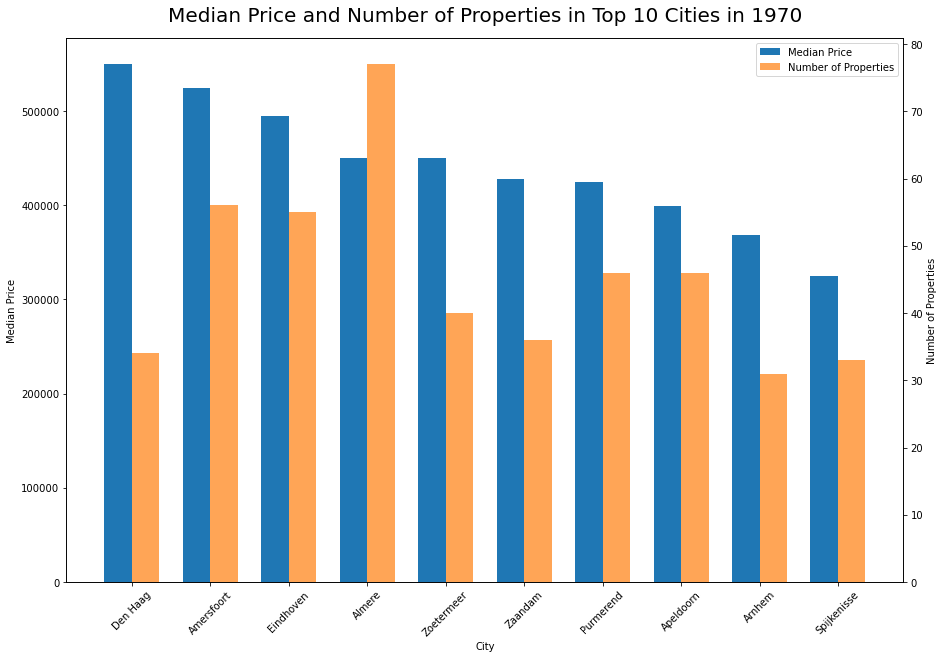

In [133]:
fig, ax = plt.subplots(figsize=(15, 10))

city_top10 = df1970.groupby('City')['Price'].agg(['count', 'median', 'mean', 'max', 'min']).sort_values(by=['count', 'median'], ascending=False).iloc[:10].sort_values(by='median', ascending=False)

# Calculate the positions of the bars
bar_width = 0.35
x = np.arange(len(city_top10.index))
y1 = city_top10['median'].values
y2 = city_top10['count'].values

# Create the first y-axis (left side) for median price
ax.bar(x - bar_width/2, height=y1, width=bar_width, label='Median Price', color='tab:blue')
ax.set_ylabel('Median Price')

# Create the second y-axis (right side) for count
ax2 = ax.twinx()
ax2.bar(x + bar_width/2, height=y2, width=bar_width, label='Number of Properties', color='tab:orange', alpha=0.7)
ax2.set_ylabel('Number of Properties')

# Set the axis labels and title
ax.set_title('Median Price and Number of Properties in Top 10 Cities in 1970', fontsize = 20, y = 1.02)
ax.set_xlabel('City')
ax.set_xticks(x)
ax.set_xticklabels(city_top10.index, rotation=45)

# Set the legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.savefig('comparision between Median vs Number of properties.jpg', dpi = 1000)
plt.show()




In [134]:
city_top10

,count,median,mean,max,min
City,,,,,
Den Haag,34,549750.0,620264.705882,945000.0,335000.0
Amersfoort,56,525000.0,563508.928571,1450000.0,375000.0
Eindhoven,55,495000.0,591618.181818,3200000.0,350000.0
Almere,77,450000.0,513311.688312,1125000.0,275000.0
Zoetermeer,40,450000.0,533887.500000,1650000.0,325000.0
Zaandam,36,427500.0,501652.777778,875000.0,300000.0
Purmerend,46,425000.0,471837.195652,1389011.0,300000.0
Apeldoorn,46,399500.0,430402.173913,950000.0,249500.0
Arnhem,31,369000.0,376016.129032,675000.0,269000.0


In [135]:
city_top10.index

CategoricalIndex(['Den Haag', 'Amersfoort', 'Eindhoven', 'Almere',
                  'Zoetermeer', 'Zaandam', 'Purmerend', 'Apeldoorn', 'Arnhem',
                  'Spijkenisse'],
                 categories=['Aalden', 'Aalsmeer', 'Aalten', 'Aardenburg', 'Aarle-Rixtel', 'Abbekerk', 'Abcoude', 'Achterveld', ...], ordered=False, dtype='category', name='City')

In [136]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [137]:
# i Ask Chatgpt to help me visualize values in folium using Map

import folium

# create a map centered on the Netherlands
m = folium.Map(location=[52.3667, 4.8945], zoom_start=8, tiles='cartodbpositron')

# define the coordinates of the cities
coords = {
    'Almere': [52.3702, 5.2140],
    'Amersfoort': [52.1561, 5.3878],
    'Eindhoven': [51.4416, 5.4697],
    'Purmerend': [52.5050, 4.9596],
    'Apeldoorn': [52.2112, 5.9699],
    'Zoetermeer': [52.0575, 4.4931],
    'Zaandam': [52.4388, 4.8261],
    'Den Haag': [52.0705, 4.3007],
    'Spijkenisse': [51.8487, 4.3291],
    'Arnhem': [51.9851, 5.8987],
}

# define the counts for each city
counts = {
    'Almere': 450000,
    'Amersfoort': 525000,
    'Eindhoven': 495000,
    'Purmerend': 450000,
    'Apeldoorn': 399500,
    'Zoetermeer': 450000,
    'Zaandam': 427500,
    'Den Haag': 549750,
    'Spijkenisse': 325000,
    'Arnhem': 369000,
}

# define the size of the bubbles based on the counts
sizes = [counts[city]/10000 for city in coords]

# create a feature group for the bubbles and the labels
fg = folium.FeatureGroup(name='Cities')

# create the bubbles and add them to the feature group
max_size = max(sizes)
max_index = sizes.index(max_size)

for i, city in enumerate(coords):
    color = '#ADD8E6'  # light blue
    fill_color = '#ADD8E6'
    
    if city == 'Den Haag':
        color = '#3186cc'  # blue
        fill_color = '#3186cc'
        icon_anchor = (110, 15)  # move the label to the left of the bubble
    elif city == 'Almere':
        color = '#FFA500'  # orange
        fill_color = '#FFA500'
        icon_anchor = (25, 15)
    else:
        icon_anchor = (25, 15)

    folium.CircleMarker(
        location=coords[city],
        radius=sizes[i]/2,
        fill=True,
        fill_opacity=0.7,
        color=color,
        fill_color=fill_color,
    ).add_to(fg)

    # add a label for the city name
    folium.Marker(
        location=coords[city],
        icon=folium.DivIcon(
            icon_size=(150,36),
            icon_anchor=icon_anchor,
            html=f'<div style="font-size: 13pt">{city}</div>'
        )
    ).add_to(fg)

# add the feature group to the map
fg.add_to(m)



# display the map
m


In [138]:
df1970.head(2)

,Address,City,Price,Lot_size(m2),Living_space(m2),Build_yrs,Build_type,Energy_label,Rooms_total,Bedrooms,Roof_1,Toilets,External_Toilet,Floor,Zolder,Kelder,Vliering,Total_floors,Energy_rank,Price_per_(m2),Median_total,Dif_Price_Median,House_types,House_types_info,Garden_type,Garden_info,Centrum,Woonwijk,Park,Bosrand,Water,Rustuge_weg,Drukke_weg,beschutte_ligging,vaarwater,Buiten_bebouwde_kom,other,difference
0,Marsstukken 30,Aalden,515000,617,221,1979.0,0,D,7,6,Zadeldak bedekt met pannen,1,1,2,1,1,0,4,8,2330.316742,465000.0,50000.0,Herenhuis,vrijstaande woning,Achtertuin,voortuin en zijtuin,0,0,0,0,0,1,0,0,0,0,0,46000.0
2,Apollostraat 9,Aalsmeer,475000,168,143,1971.0,0,C,5,4,Zadeldak bedekt met pannen,1,1,3,0,0,0,3,7,3321.678322,465000.0,10000.0,Eengezinswoning,hoekwoning,Achtertuin en voortuin,NaN,0,1,1,0,0,0,0,0,0,0,0,6000.0


In [139]:
top4_House_t_count = list(df.groupby('House_types')['Price'].count().sort_values(ascending  = False).iloc[:4].index)


In [140]:
top4_House_t_count

['Eengezinswoning', 'Villa', 'Herenhuis', 'Bungalow']

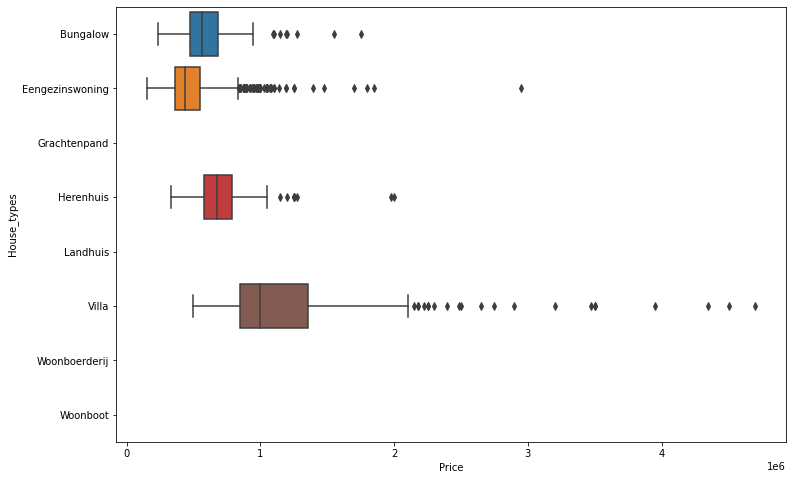

In [141]:
# Lets show that in catplot
fig = plt.subplots(figsize = (12,8))

sns.boxplot(
    x='Price', 
    y='House_types', 
    data=df1970.query("House_types == @top4_House_t_count")
)

plt.show()

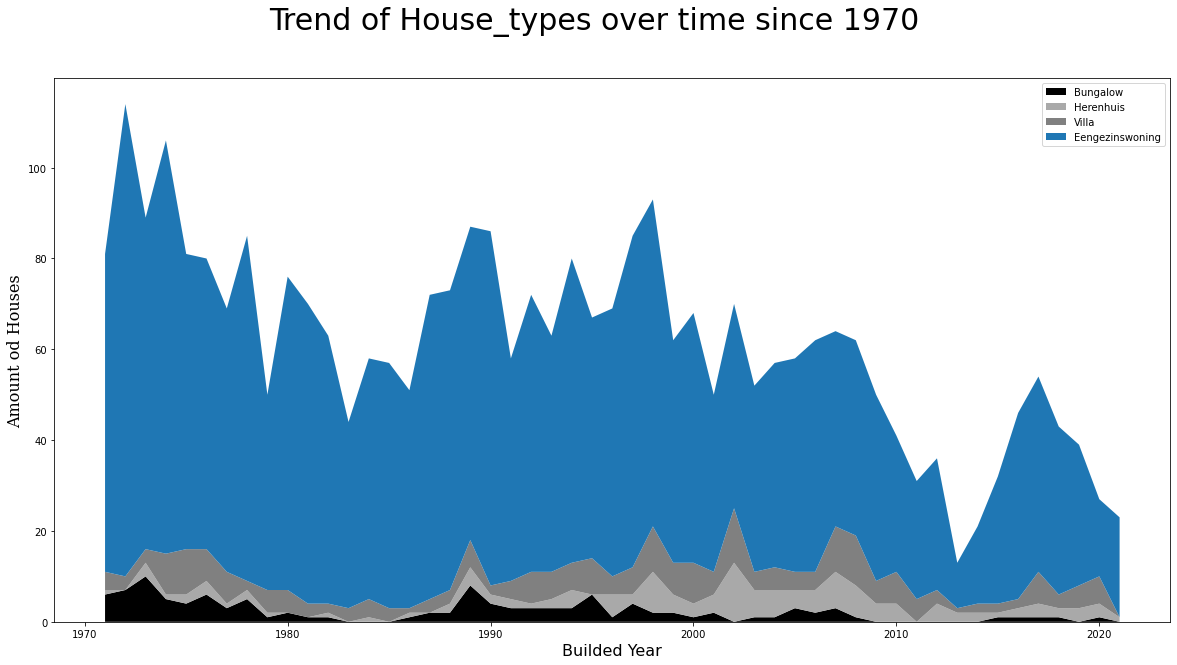

In [142]:
fig,ax = plt.subplots(figsize = (20,10))



labels = ['Eengezinswoning','Villa','Herenhuis','Bungalow'][::-1]
colors = ['#1f77b4','grey','darkgrey','black'][::-1]

count_price_years_pivot = df1970.query("House_types == @top4_House_t_count").pivot_table(
        index = 'Build_yrs',
        columns='House_types',
        values = 'Price',
        aggfunc = 'count'
)

ax.stackplot(count_price_years_pivot.index,
             count_price_years_pivot['Bungalow'],
             count_price_years_pivot['Herenhuis'],
             count_price_years_pivot['Villa'],
             count_price_years_pivot['Eengezinswoning'],
             colors = colors,
             labels = labels
            )
fig.suptitle('Trend of House_types over time since 1970', fontsize = 30)
ax.set_ylabel('Amount od Houses', fontsize = 16, family = 'serif')
ax.set_xlabel('Builded Year', fontsize = 16)

ax.legend()
plt.savefig("Trend of house types over time since 1970.jpg",dpi = 1000)

plt.show()

In [143]:
import scipy.stats as stats

stats.linregress(count_price_years_pivot.index, count_price_years_pivot['Eengezinswoning'])

LinregressResult(slope=-1.0143891402714933, intercept=2076.289351432881, rvalue=-0.7900473928048223, pvalue=5.484477964219133e-12, stderr=0.11244659462825617, intercept_stderr=224.44950585836006)

In [144]:
count_price_years_pivot.head()

House_types,Bungalow,Eengezinswoning,Grachtenpand,Herenhuis,Landhuis,Villa,Woonboerderij,Woonboot
Build_yrs,,,,,,,,
1971.0,6,70,0,1,0,4,0,0
1972.0,7,104,0,0,0,3,0,0
1973.0,10,73,0,3,0,3,0,0
1974.0,5,91,0,1,0,9,0,0
1975.0,4,65,0,2,0,10,0,0


* Based on the chart provided, it appears that there has been a significant decrease in the number of "Eengezinswoning" houses sold over time. This downward trend may suggest that fewer "Eengezinswoning" houses are being built compared to other housing types, such as apartments, which are not included in our dataset.


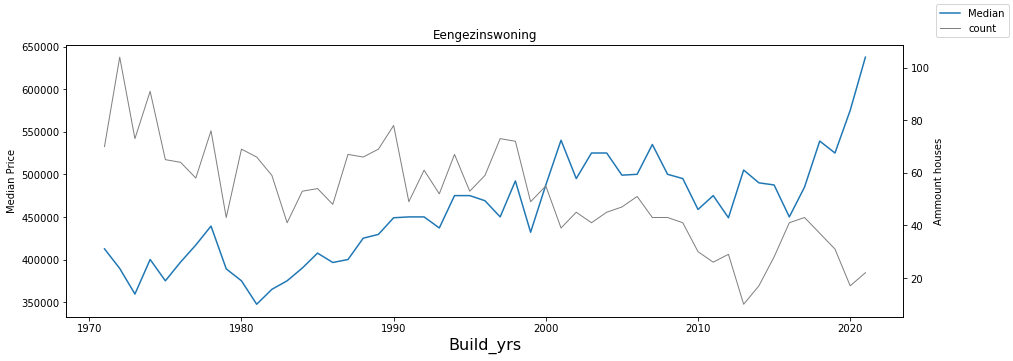

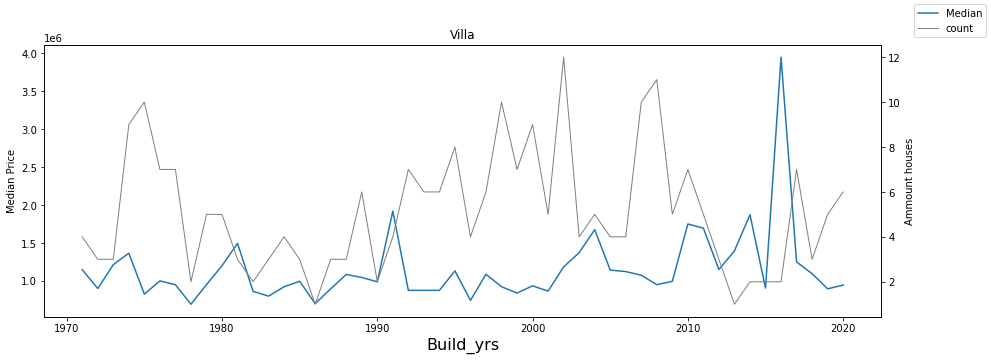

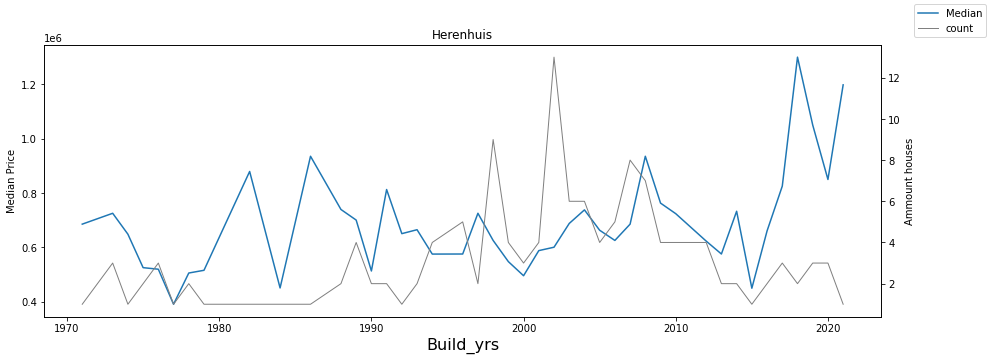

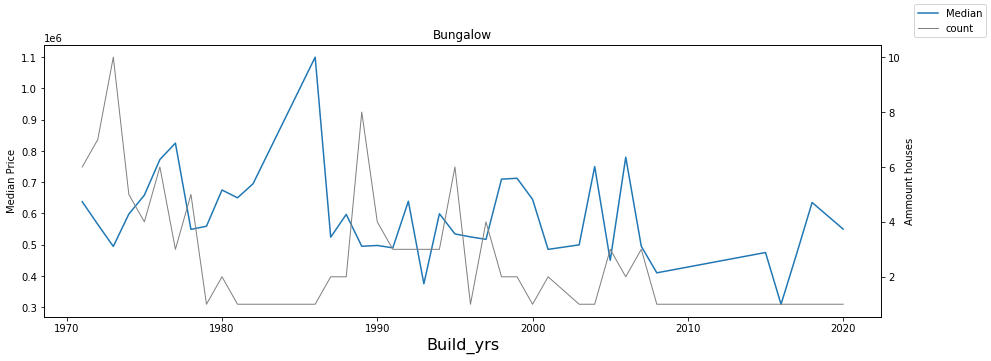

In [145]:
# Lets compare each Hosue type from our top4 with median and count to see better correlation

top4 = ['Eengezinswoning', 'Villa', 'Herenhuis', 'Bungalow']

for var in top4:
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.set_title(var)
    
    median_price_years_pivot = df1970.query("House_types == @var").pivot_table(
        index='Build_yrs',
        columns='House_types',
        values='Price',
        aggfunc='median',
    )
    
    ax.plot(median_price_years_pivot[var], label = 'Median')
    ax.set_xlabel('Build_yrs', fontsize = 16)
    ax.set_ylabel('Median Price')
    
    count_price_years_pivot = df1970.query("House_types == @var").pivot_table(
        index='Build_yrs',
        columns='House_types',
        values='Price',
        aggfunc='count'
    )
    
    ax1 = ax.twinx()
    ax1.plot(count_price_years_pivot[var], lw=1, c='grey', label='count')
    ax1.set_ylabel('Ammount houses')
    
    
    fig.legend()
    plt.show()


* Toper "Eengezinswoning": Based on the data in the chart, we can conclude that as the house age decreases, the number of Eengezinswoning houses also decreases. However, the median price for these houses tends to increase. This suggests that there may be a higher demand for newer Eengezinswoning houses, leading to an increase in their value. It is also possible that newer Eengezinswoning houses are built with more modern amenities and features, which can also contribute to their higher median price.

* It is evident from the data that bungalows are not in high demand, evidenced by the low interest and decreasing prices in comparison to those of "eengezinswoning" homes.

### Let check how the 'Eengezinswoning' looks in Energy_ranking

In [146]:
Energy_Eengezinswoning = df1970.query(
    "House_types == 'Eengezinswoning'").groupby(
        'Energy_label')['Price'].agg(['median','count']).assign(
            pct=lambda x: round(x['count'] / sum(x['count']) * 100,2)
).sort_values(by = 'pct', ascending = False)

In [147]:
Energy_Eengezinswoning1 = df1970.query(
    "House_types == 'Eengezinswoning'").groupby(
        'Energy_label')['Price'].agg(['median','count']).assign(
            pct=lambda x: round(x['count'] / sum(x['count']) * 100,2)
)

In [148]:
dfi.export(Energy_Eengezinswoning,'Energy_Ranking.jpg',dpi = 1000)
Energy_Eengezinswoning

C:\Program Files\Google\Chrome\Application\chrome.exe


,median,count,pct
Energy_label,,,
A,470000.0,945,35.93
C,399000.0,771,29.32
B,428500.0,650,24.71
D,395000.0,134,5.10
A+,519000.0,59,2.24
E,450000.0,29,1.10
A++,500000.0,14,0.53
F,382500.0,14,0.53
A+++,650000.0,9,0.34


In [149]:
rest = [types for types in Energy_Eengezinswoning.T.columns if types not in ['A','B','C']]

Energy_Eengezinswoning_pie = Energy_Eengezinswoning.T.assign(
    Top3 = Energy_Eengezinswoning.T.loc['pct',['A','B','C']].sum(),
    Rest = Energy_Eengezinswoning.T.loc['pct',rest].sum()
).loc['pct',:]

Energy_Eengezinswoning_pie

Energy_label
A                 35.93
C                 29.32
B                 24.71
D                  5.10
A+                 2.24
E                  1.10
A++                0.53
F                  0.53
A+++               0.34
G                  0.11
A++++              0.04
Niet verplicht     0.04
Top3              89.96
Rest              10.03
Name: pct, dtype: float64

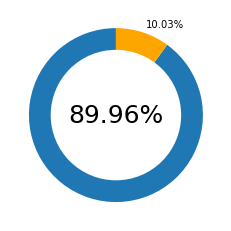

In [150]:
fig, ax = plt.subplots()

ax.pie(
    Energy_Eengezinswoning_pie.values[-2:],
    startangle = 90,
    labels = [" ",f"{round(Energy_Eengezinswoning_pie['Rest'],2)}%"],
    colors = ['#1f77b4','orange']
)

hole = plt.Circle((0,0),.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.text(
    0,
    0,
    f"{round(Energy_Eengezinswoning_pie['Top3'],2)}%",
    fontsize = 25,
    ha = 'center',
    va = 'center',
)
plt.savefig('Top3 Energy_labels vs Rest.jpg',dpi = 1000)

plt.show()

Based on the table, we can make the following conclusions about Eengezinswoning (single-family homes) in the given dataset:

    * Most of the single-family homes have an energy label of A, with a median price of 470,000 Euros, and the highest percentage of 35.93%.
    * The second most common energy label is C, with a median price of 399,000 Euros, and 29.32% of the homes having this label.
    * B is the third most common energy label, with a median price of 428,500 Euros, and 24.71% of the homes having this label.
    * D is the fourth most common energy label, with a median price of 395,000 Euros, and only 5.10% of the homes having this label.
    * The other energy labels are less common, with less than 3% of the homes having each of them. These labels are A+, E, A++, F, A+++, G, and A++++, and their median prices range from 382,500 to 1,395,000 Euros.
    * There is also one home with the label "Niet verplicht" (not mandatory), with a median price of 585,000 Euros, and a percentage of 0.04%.

Overall, it seems that homes with better energy labels tend to have higher median prices, and homes with worse energy labels tend to have lower median prices. This is consistent with the idea that energy-efficient homes may be more valuable which is generally the most officiant and les energy consuming and desirable to buyers.



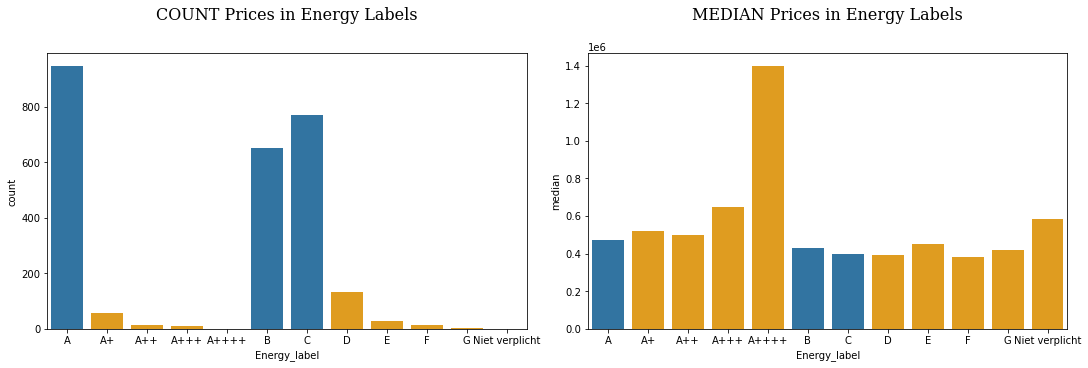

In [151]:
fig, ax = plt.subplots(1,2,figsize = (15,5), constrained_layout = True)

labels = ['A','B','C']
color = ['#1f77b4' if var in ['A', 'B', 'C'] else 'orange' for var in Energy_Eengezinswoning1.index ]

sns.barplot(
    x = Energy_Eengezinswoning1.index,
    y = 'count',
    data = Energy_Eengezinswoning1,
    palette = color,
    ax = ax[0]
)
ax[0].set_title('COUNT Prices in Energy Labels' , fontsize = 16, family = 'serif', y = 1.1)
fig.savefig('Count Price in Energy Labels.jpg', dpi = 1000)

sns.barplot(
    x = Energy_Eengezinswoning1.index,
    y = 'median',
    data = Energy_Eengezinswoning1,
    palette = color,
    ax = ax[1]
)
ax[1].set_title('MEDIAN Prices in Energy Labels' , fontsize = 16, family = 'serif', y = 1.1)
fig.savefig('Median Price in Energy Labels.jpg', dpi = 1000)



plt.show()

### Lets break down 'Eengezinswoning' into 3 most mommon Energy labels and see how that trend develope in Build_yrs

In [152]:
mask = ((df1970['House_types'] == 'Eengezinswoning') & (df1970['Energy_label'].isin(['A','B','C'])))

top3_Energy_Eengezinswoning = df1970.loc[mask, ['Build_yrs','Energy_label','Price']]

In [153]:
top3_Energy_Eengezinswoning

,Build_yrs,Energy_label,Price
2,1971.0,C,475000
4,1975.0,C,440000
6,1984.0,C,500000
10,2005.0,A,795000
12,2004.0,A,780000
...,...,...,...
5544,1979.0,B,349000
5545,1980.0,C,500000
5547,1985.0,C,389500
5552,1999.0,B,449000


In [154]:
top3_Energy_Eengezinswoning_Grouped= top3_Energy_Eengezinswoning.groupby('Energy_label')['Build_yrs'].max().dropna()
top3_Energy_Eengezinswoning_Grouped

Energy_label
A    2021.0
B    2009.0
C    2007.0
Name: Build_yrs, dtype: float64

In [155]:
top3_Energy_Eengezinswoning_Groupedd= top3_Energy_Eengezinswoning.pivot_table(
    index = 'Build_yrs',
    columns = 'Energy_label',
    values = 'Price',
    aggfunc = 'count'
).loc[:,['A','B','C']]

top3_Energy_Eengezinswoning_Groupedd.head()

Energy_label,A,B,C
Build_yrs,,,
1971.0,3,4,40
1972.0,5,16,47
1973.0,2,8,40
1974.0,5,9,50
1975.0,7,13,29


* After 2009, all newly built single-family homes have been constructed with Energy Label 'A', the most energy-efficient rating. This is a significant improvement over previously built homes, which were given a rating of 'B' or 'C' prior to 2007-2009.

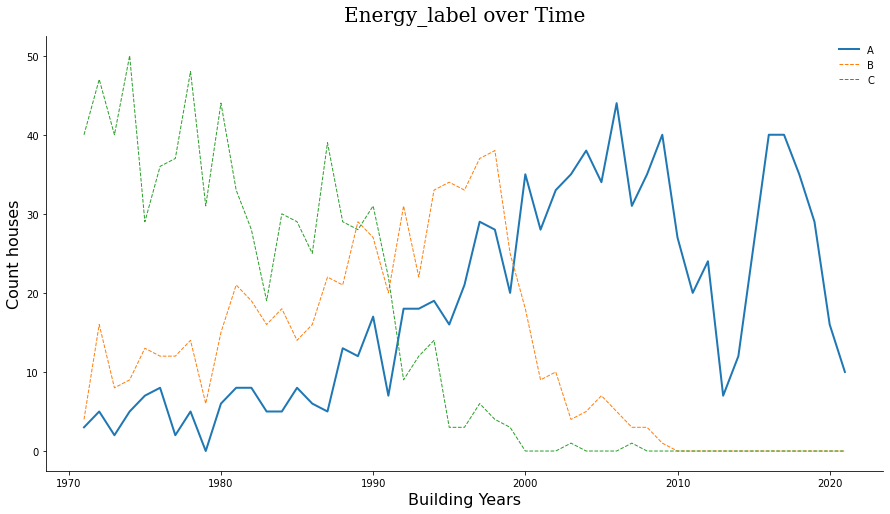

In [156]:
fig,ax =plt.subplots(figsize = (15,8))

plt.plot(
    top3_Energy_Eengezinswoning_Groupedd.iloc[:, 0], lw = 2, label = 'A'
)

plt.plot(
    top3_Energy_Eengezinswoning_Groupedd.iloc[:, 1], lw = 1, ls = '--', label = 'B'
)

plt.plot(
    top3_Energy_Eengezinswoning_Groupedd.iloc[:, 2], lw = 1, ls = '--', label = 'C'
)

ax.spines[['top','right']].set_visible(False)
plt.legend(top3_Energy_Eengezinswoning_Groupedd.columns, frameon = False)
plt.title('Energy_label over Time', fontsize = 20, family = 'serif', y = 1.02)
plt.xlabel('Building Years', fontsize = 16)
plt.ylabel('Count houses', fontsize = 16)



plt.savefig('Energy_label over Time.jpg', dpi = 1000)
plt.show()

In [157]:
df1970['Price'][df1970['House_types'] == 'Eengezinswoning'].nlargest(10)

3107    2950000
4297    1850000
699     1800000
3037    1700000
4639    1475000
2011    1395000
2108    1250000
3752    1250000
3038    1195000
624     1190000
Name: Price, dtype: int64

* After 2009, all newly built single-family homes have been constructed with Energy Label 'A', the most energy-efficient rating. This is a significant improvement over previously built homes, which were given a rating of 'B' or 'C' prior to 2007-2009.

* Lets look for all Energy_labels to make better overwiev.

In [158]:
Energy_Label_Eengezinswoning = df1970.loc[df1970['House_types'] == 'Eengezinswoning', ['Build_yrs','Energy_label','Price']]

In [159]:
Energy_Label_Eengezinswoning_Grouped= Energy_Label_Eengezinswoning.groupby('Energy_label')['Build_yrs'].agg(['max','count']).dropna()
Energy_Label_Eengezinswoning_Grouped

dfi.export(Energy_Label_Eengezinswoning_Grouped, 'Energy_label_over_time_laps.jpg', dpi = 1000)

C:\Program Files\Google\Chrome\Application\chrome.exe


The majority of houses built after a certain year (in this case, after 2009) have a high energy label (in this case, 'A', 'A+', 'A++', 'A+++', 'A++++'), it likely means that there have been changes in building regulations or incentives for energy-efficient housing in the country where the dataset was collected.

This can have a few potential implications for the house market:

- Higher demand for energy-efficient homes: If energy-efficient homes are considered more desirable by buyers, then homes with high energy labels may sell for a premium compared to homes with lower energy labels.

- Increased competition for older homes: If older homes in the dataset have lower energy labels, they may be less desirable to buyers compared to newer, more energy-efficient homes. This could lead to increased competition among sellers of older homes, potentially resulting in lower prices.

- Higher construction costs: Building homes with high energy labels typically requires the use of more expensive materials and technologies. This could result in higher construction costs for builders, which could be passed on to buyers in the form of higher home prices.

Overall, the shift towards more energy-efficient homes in the dataset could reflect a broader trend towards sustainable building practices and energy conservation.

In [160]:
for types in ['Eengezinswoning', 'Villa', 'Herenhuis']:
    mask_ = ((df1970['House_types'] == types) & (df1970['Energy_label'].isin(df1970['Energy_label'].unique())))
    top3_Energy = df1970.loc[mask_, ['Build_yrs','Energy_label','Price']]
    top3_Energy_Grouped= top3_Energy.groupby('Energy_label')['Build_yrs'].agg(['max','count']).dropna()
    print(f"{types} with Energy Label A, B, or C:")
    
    print(top3_Energy_Grouped)
    print()
    print()

Eengezinswoning with Energy Label A, B, or C:
                   max  count
Energy_label                 
A               2021.0    945
A+              2021.0     59
A++             2021.0     14
A+++            2021.0      9
A++++           2020.0      1
B               2009.0    650
C               2007.0    771
D               1996.0    134
E               1992.0     29
F               2003.0     14
G               1985.0      3
Niet verplicht  1973.0      1


Villa with Energy Label A, B, or C:
                 max  count
Energy_label               
A             2020.0    102
A+            2017.0      7
A++           2020.0      4
A+++          2020.0      4
A++++         2018.0      1
B             2009.0     59
C             2005.0     63
D             1987.0     12
E             1973.0      3


Herenhuis with Energy Label A, B, or C:
                 max  count
Energy_label               
A             2021.0     86
A+            2013.0      6
A++           2014.0      1
A+++  

Eengezinswoning with Energy Label A, B, or C:
AxesSubplot(0.125,0.125;0.775x0.755)


Villa with Energy Label A, B, or C:
AxesSubplot(0.125,0.125;0.775x0.755)


Herenhuis with Energy Label A, B, or C:
AxesSubplot(0.125,0.125;0.775x0.755)




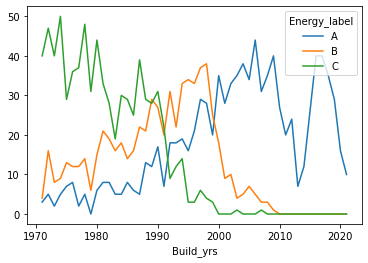

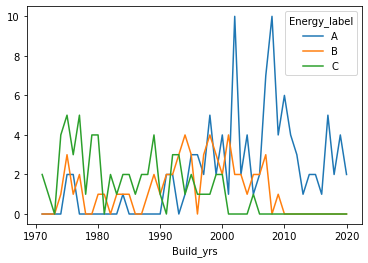

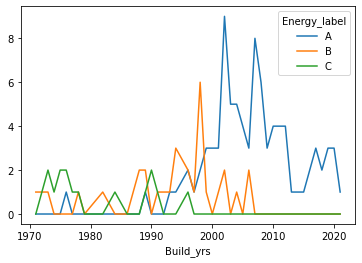

In [161]:
for types in ['Eengezinswoning', 'Villa', 'Herenhuis']:
    mask_ = ((df1970['House_types'] == types) & (df1970['Energy_label'].isin(df1970['Energy_label'].unique())))
    top3_Energy = df1970.loc[mask_, ['Build_yrs','Energy_label','Price']]
    top3_Energy_Grouped= top3_Energy.pivot_table(
    index = 'Build_yrs',
    columns = 'Energy_label',
    values = 'Price',
    aggfunc = 'count'
    ).loc[:,['A','B','C']].plot()

    
    
    print(f"{types} with Energy Label A, B, or C:")
    
    print(top3_Energy_Grouped)
    print()
    print()
plt.show()

* We will go deeper into houses built after 1970 with the house type "Eengezinswoning" and energy label "A" to investigate its impact on prices and other factors

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_8680\306253836.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df1970[mask]


<AxesSubplot:>

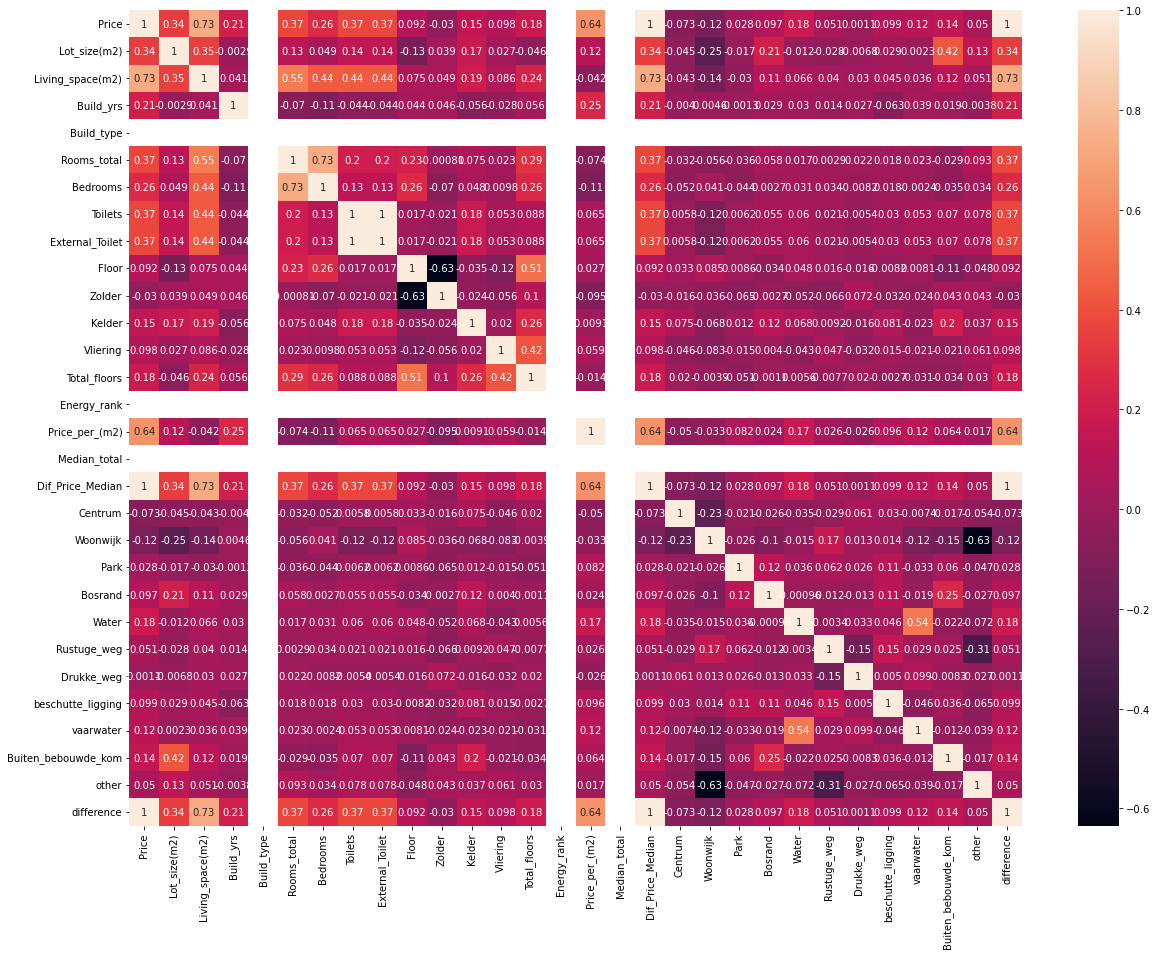

In [162]:
fig.ax = plt.subplots(figsize = (20,15))

mask = (df['Energy_label'] == 'A') & (df1970['House_types'] == 'Eengezinswoning')
df_filtered = df1970[mask]
sns.heatmap(df_filtered.corr(), annot = True)

# Look for correlation between:
# Room_total vs Bedrooms
# 

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_8680\1069017574.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered = df1970[mask]


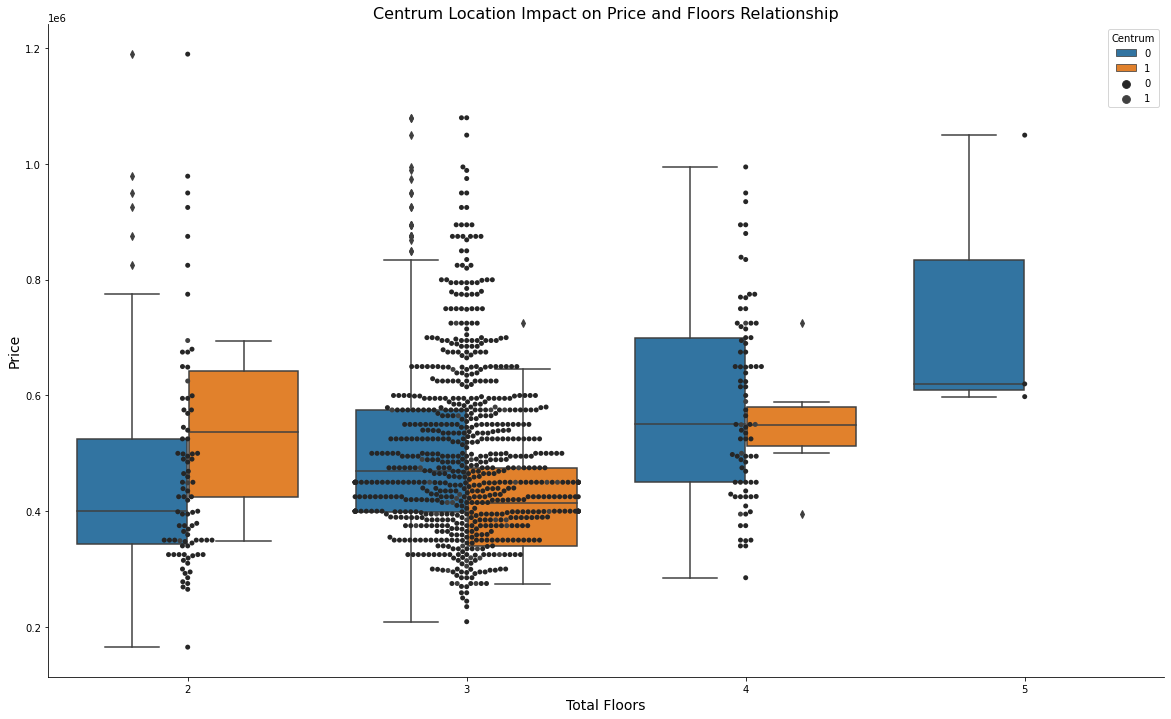

In [163]:
fig, ax = plt.subplots(figsize=(20, 12))
# filter the data for Energy_label == 'A'
mask = (df['Energy_label'] == 'A') & (df1970['House_types'] == 'Eengezinswoning')
df_filtered = df1970[mask]

# create the box plot
sns.boxplot(x='Total_floors', y='Price', hue='Centrum', data=df_filtered, ax=ax)
# add the strip plot
sns.swarmplot(x="Total_floors", y="Price", hue="Centrum", data=df_filtered, color=".25", ax=ax)
# show the plot
sns.despine(ax=ax)

ax.set_title("Centrum Location Impact on Price and Floors Relationship", fontsize=16)
ax.set_xlabel("Total Floors", fontsize=14)
ax.set_ylabel("Price", fontsize=14)

plt.savefig("Centrum Location Impact on Price and Floors Relationship.jpg",dpi = 1000)
# show how many values in each floor
df_filtered['Total_floors'].value_counts()

plt.show()

In [164]:
df_filtered['Total_floors'].value_counts(normalize=True)

3    0.814815
2    0.092063
4    0.089947
5    0.003175
Name: Total_floors, dtype: float64

In [165]:
df_filtered.query("Total_floors == 3").groupby('Centrum')['Total_floors'].count()

Centrum
0    733
1     37
Name: Total_floors, dtype: int64

* I am curious to investigate if there is any difference in the living space (m2) between houses with 2 and 3 floors
* Lets make T-Test fot that 

In [166]:
df.head(2)

,Address,City,Price,Lot_size(m2),Living_space(m2),Build_yrs,Build_type,Energy_label,Rooms_total,Bedrooms,Roof_1,Toilets,External_Toilet,Floor,Zolder,Kelder,Vliering,Total_floors,Energy_rank,Price_per_(m2),Median_total,Dif_Price_Median,House_types,House_types_info,Garden_type,Garden_info,Centrum,Woonwijk,Park,Bosrand,Water,Rustuge_weg,Drukke_weg,beschutte_ligging,vaarwater,Buiten_bebouwde_kom,other
0,Marsstukken 30,Aalden,515000,617,221,1979.0,0,D,7,6,Zadeldak bedekt met pannen,1,1,2,1,1,0,4,8,2330.316742,465000.0,50000.0,Herenhuis,vrijstaande woning,Achtertuin,voortuin en zijtuin,0,0,0,0,0,1,0,0,0,0,0
1,Vivaldihof 26,Aalsmeer,360000,101,69,1968.0,0,D,4,3,Zadeldak bedekt met pannen,1,1,3,0,0,0,3,8,5217.391304,465000.0,-105000.0,Eengezinswoning,hoekwoning,Achtertuin,NaN,0,1,1,0,0,1,0,0,0,0,0


In [167]:
mask2 = (df['Energy_label'] == 'A') & (df1970['House_types'] == 'Eengezinswoning') & (df1970['Total_floors'] == 2)
mask3 = (df['Energy_label'] == 'A') & (df1970['House_types'] == 'Eengezinswoning') & (df1970['Total_floors'] == 3)


summary, results = rp.ttest(
    group1 = df1970['Price'][mask2], group1_name = 'Floors_2',
    group2 = df1970['Price'][mask3], group2_name = 'Floors_3'
)

print(summary)
print()
print()

print(results)

   Variable      N           Mean             SD            SE      95% Conf.  \
0  Floors_2   87.0  465258.620690  181975.734104  19509.846557  426474.329364   
1  Floors_3  770.0  496950.514286  143769.846587   5181.105632  486779.726010   
2  combined  857.0  493733.250875  148282.483043   5065.233131  483791.519325   

        Interval  
0  504042.912016  
1  507121.302561  
2  503674.982425  


                    Independent t-test     results
0  Difference (Floors_2 - Floors_3) =  -31691.8936
1                Degrees of freedom =     855.0000
2                                 t =      -1.8925
3             Two side test p value =       0.0588
4            Difference < 0 p value =       0.0294
5            Difference > 0 p value =       0.9706
6                         Cohen's d =      -0.2140
7                         Hedge's g =      -0.2139
8                    Glass's delta1 =      -0.1742
9                  Point-Biserial r =      -0.0646


C:\Users\pkucharzak\Anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


- The mean price of three-story houses with Energy Label A in the Centrum area (€496,950) is higher than the mean price of two-story houses (€465,258).
- However, the independent t-test shows that the difference in means is not statistically significant (t(855) = -1.8925, p = 0.0588).
- The effect size of the difference between the two groups is small (Cohen's d = -0.2140, Hedge's g = -0.2139, Glass's delta = -0.1742).

Based on the p-value of the two-sided test, we cannot reject the null hypothesis that there is no significant difference in the mean price between two and three-story houses with Energy Label A in the Centrum area (p > 0.05).
However, if we use a one-sided test to check if the mean price of two-story houses is significantly lower than three-story houses, the p-value is 0.0294, which is less than the alpha level of 0.05, indicating that we can reject the null hypothesis and conclude that two-story houses are significantly cheaper than three-story houses in the Centrum area with Energy Label A.

C:\Users\pkucharzak\AppData\Local\Temp\ipykernel_8680\3999243479.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = df1970[mask4]


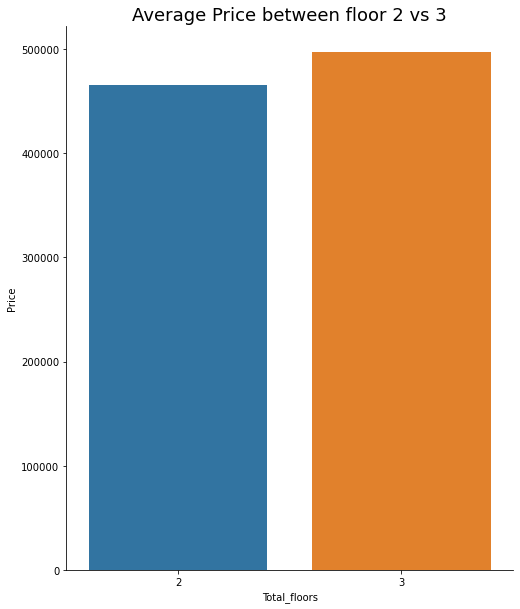

In [168]:
fig,ax = plt.subplots(figsize = (8,10))

mask4 = (df['Energy_label'] == 'A') & (df1970['House_types'] == 'Eengezinswoning') & (df1970['Total_floors'].isin([2,3]))

sns.barplot(
    x = 'Total_floors',
    y = 'Price',
    ci = None,
    data = df1970[mask4]
)

ax.set_title("Average Price between floor 2 vs 3", fontsize = 18)
ax.spines[['top','right']].set_visible(False)

plt.savefig('Average Price between floor 2 vs 3.jpg',dpi = 1000)
plt.show()